In [1]:
import pandas as pd

nyt_data = pd.read_csv("/content/nyt_data_unique.csv")
spacy_tfidf_data = pd.read_csv("/content/weighted_combined_keywords_2 (1).csv")

print("NYT Data Sample:\n", nyt_data.head())
print("\nSpacy+TFIDF Data Sample:\n", spacy_tfidf_data.head())

NYT Data Sample:
   keyword                                           headline  \
0     doe  35 Years Later, the Remains Known as ‘Chimney ...   
1     doe  Man Convicted in Transgender Woman’s Killing i...   
2     doe  Agency for Protecting Children Traumatizes Fam...   
3     doe                 OK, Class, First We Shoot the Deer   
4     doe  Unsealed Documents Shed Light on Epstein’s Mis...   

                                            abstract  \
0  A skeleton found in the chimney of a Wisconsin...   
1  Prosecutors said the man was upset that word a...   
2  A lawsuit says that investigators for the Admi...   
3  A Missouri high school program teaches student...   
4  The court documents include unredacted names o...   

                   pub_date section_name     type_of_material document_type  \
0  2024-05-16T17:36:44+0000         U.S.                 News       article   
1  2024-02-24T22:33:52+0000         U.S.                 News       article   
2  2024-02-20T13:43:06+

In [2]:
nyt_data['keyword'] = nyt_data['keyword'].str.lower()
spacy_tfidf_data['Keyword'] = spacy_tfidf_data['Keyword'].str.lower()

In [3]:
filtered_data = pd.merge(nyt_data, spacy_tfidf_data, left_on='keyword', right_on='Keyword', how='inner')

filtered_data = filtered_data[nyt_data.columns]

In [4]:
filtered_data.to_csv("/content/filtered_nyt_data.csv", index=False)

print("Filtered data saved to 'filtered_nyt_data.csv'.")

Filtered data saved to 'filtered_nyt_data.csv'.


In [5]:
import pandas as pd

filtered_data = pd.read_csv("/content/filtered_nyt_data.csv")


filtered_data['pub_date'] = pd.to_datetime(filtered_data['pub_date'])


filtered_data['year_month'] = filtered_data['pub_date'].dt.to_period('M')

keyword_trends = filtered_data.groupby(['year_month', 'keyword']).size().reset_index(name='count')

print(keyword_trends.head())


  year_month               keyword  count
0    2024-01       approval rating     10
1    2024-01    battleground state      2
2    2024-01  biden administration      6
3    2024-01                  bill     26
4    2024-01             candidate     18


<ipython-input-5-9a10f2fe3e76>:10: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  filtered_data['year_month'] = filtered_data['pub_date'].dt.to_period('M')


In [7]:
from nltk.stem import WordNetLemmatizer
import nltk
import re

nltk.download('wordnet')
nltk.download('omw-1.4')


lemmatizer = WordNetLemmatizer()

regex_mappings = {
    r'\b(donald)\s(trump)\b': 'donald trump',
    r'\b(kamala)\s(harris)\b': 'kamala harris',
    r'\b(joe)\s(biden)\b': 'joe biden',
    r'\b(democratic)\s(party)\b': 'democratic party',
    r'\b(republican)\s(party)\b': 'republican party',
    r'\b(vice)\s(president)\b': 'vice president',
    r'\b(president)\b': 'president',
    r'\b(white)\s(house)\b': 'white house',
    r'\b(supreme)\s(court)\b': 'supreme court',
    r'\b(united)\s(states)\b': 'united states',
}


def normalize_keyword(keyword):
    keyword = keyword.lower()
    keyword = lemmatizer.lemmatize(keyword)

    # Apply regex mappings
    for pattern, replacement in regex_mappings.items():
        keyword = re.sub(pattern, replacement, keyword, flags=re.IGNORECASE)
    return keyword

keyword_trends['normalized_keyword'] = keyword_trends['keyword'].apply(normalize_keyword)


synonym_mapping = {

    'donald trump': 'donald trump',
    'trump win': 'donald trump',
    'donald': 'donald trump',
    'trump': 'donald trump',
    'donald j trump': 'donald trump',
    'biden': 'joe biden',
    'joe biden': 'joe biden',
    'joe': 'joe biden',
    'biden win': 'joe biden',
    'kamala harris': 'kamala harris',
    'kamala': 'kamala harris',
    'harris': 'kamala harris',
    'harris win': 'kamala harris',


    'president': 'leadership',
    'presidential': 'leadership',
    'presidential election': 'election',
    'electoral college': 'election',
    'election day': 'election',
    'swing state': 'election',
    'republican party': 'party',
    'democratic': 'party',


    'white house': 'government',
    'supreme court': 'court',
    'united states': 'usa',
    'america': 'usa',
    'american': 'usa',

    'voter': 'voting',
    'voting': 'voting',
    'race': 'campaign',
    'campaign': 'campaign',
    'bill': 'policy',
    'policy': 'policy',
    'government': 'policy',
    'country': 'nation',
    'politics': 'political',
}


keyword_trends['grouped_keyword'] = keyword_trends['normalized_keyword'].replace(synonym_mapping)


grouped_trends = keyword_trends.groupby(['year_month', 'grouped_keyword'])['count'].sum().reset_index()


print(grouped_trends.head(10))


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


  year_month       grouped_keyword  count
0    2024-01       approval rating     10
1    2024-01    battleground state      2
2    2024-01  biden administration      6
3    2024-01             candidate     18
4    2024-01                   doe      9
5    2024-01          donald trump     30
6    2024-01                  dont      2
7    2024-01            early vote     11
8    2024-01          early voting      2
9    2024-01              election     41


In [8]:
print(grouped_trends.head(10))

  year_month       grouped_keyword  count
0    2024-01       approval rating     10
1    2024-01    battleground state      2
2    2024-01  biden administration      6
3    2024-01             candidate     18
4    2024-01                   doe      9
5    2024-01          donald trump     30
6    2024-01                  dont      2
7    2024-01            early vote     11
8    2024-01          early voting      2
9    2024-01              election     41


<ipython-input-9-04a71c2236a6>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_grouped_trends['year_month_str'] = top_grouped_trends['year_month'].astype(str)


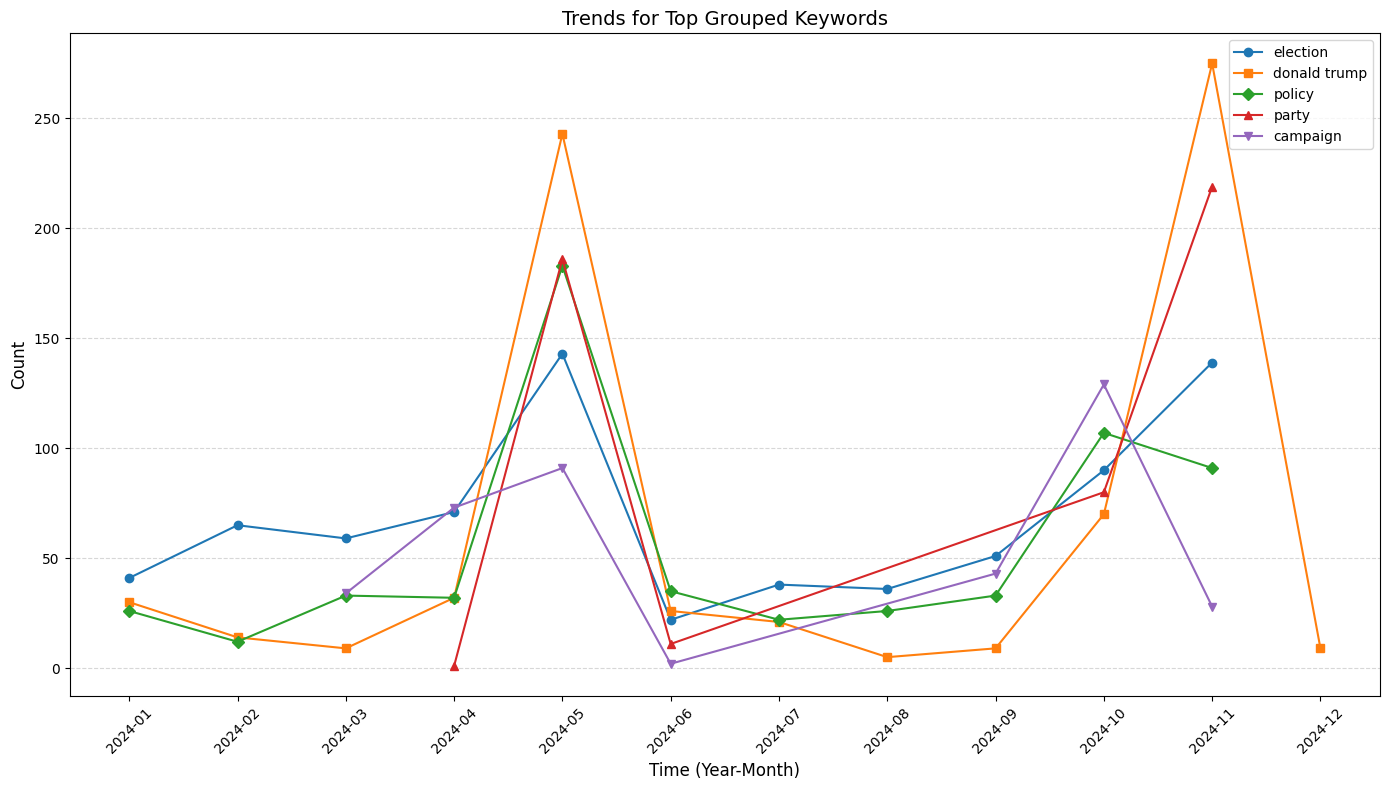

In [9]:
import matplotlib.pyplot as plt
top_grouped_keywords = grouped_trends.groupby('grouped_keyword')['count'].sum().nlargest(5).index
top_grouped_trends = grouped_trends[grouped_tren
                                    ds['grouped_keyword'].isin(top_grouped_keywords)]

top_grouped_trends['year_month_str'] = top_grouped_trends['year_month'].astype(str)


plt.figure(figsize=(14, 8))
markers = ['o', 's', 'D', '^', 'v']
for i, keyword in enumerate(top_grouped_keywords):
    subset = top_grouped_trends[top_grouped_trends['grouped_keyword'] == keyword]
    plt.plot(
        subset['year_month_str'],
        subset['count'],
        label=keyword,
        marker=markers[i],
        linestyle='-',
        linewidth=1.5
    )

plt.xticks(rotation=45)
plt.title('Trends for Top Grouped Keywords', fontsize=14)
plt.xlabel('Time (Year-Month)', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.legend()
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.5)

plt.show()

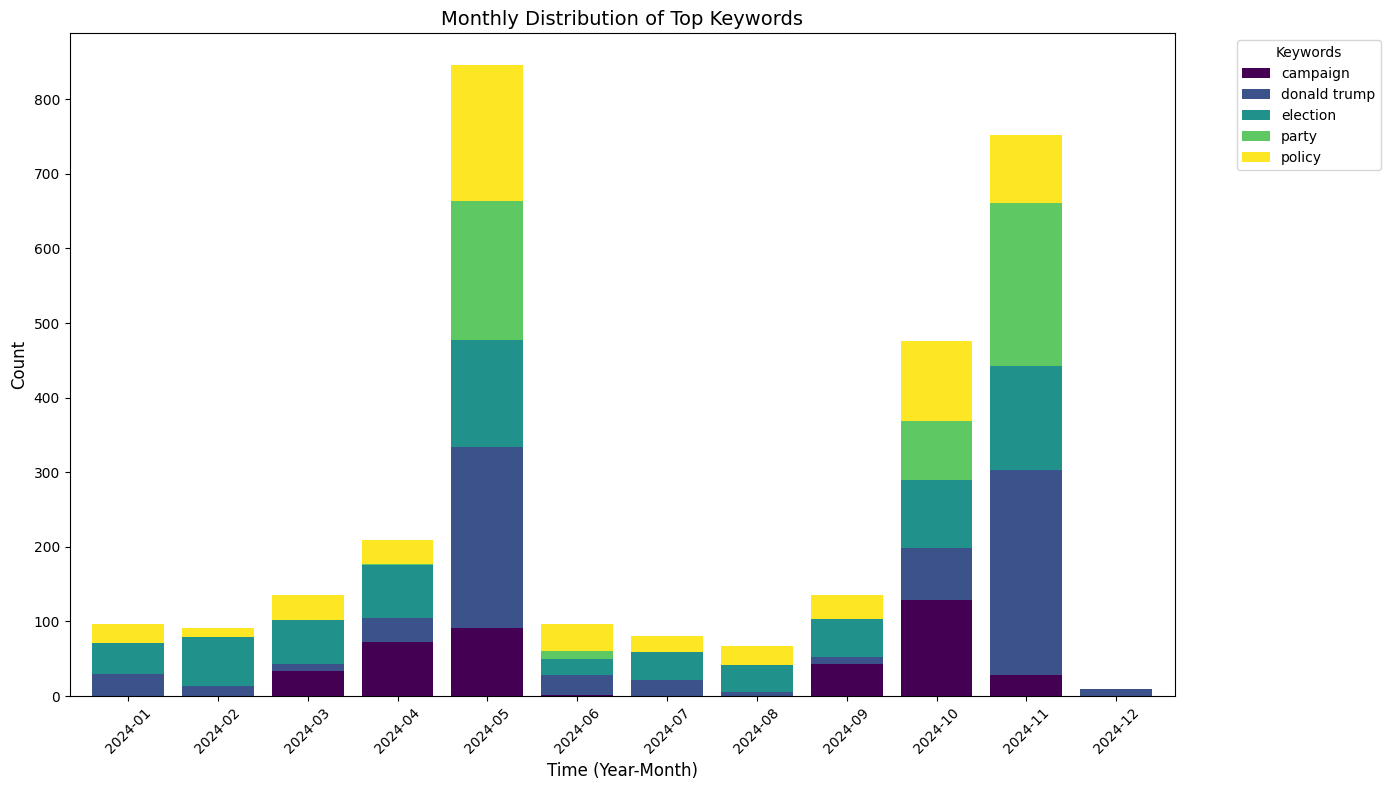

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns


top_grouped_keywords = grouped_trends.groupby('grouped_keyword')['count'].sum().nlargest(5).index


top_grouped_trends = grouped_trends[grouped_trends['grouped_keyword'].isin(top_grouped_keywords)]


pivot_data = top_grouped_trends.pivot(index='year_month', columns='grouped_keyword', values='count').fillna(0)


pivot_data.plot(
    kind='bar',
    figsize=(14, 8),
    width=0.8,
    stacked=True,
    colormap='viridis'
)


plt.title('Monthly Distribution of Top Keywords', fontsize=14)
plt.xlabel('Time (Year-Month)', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Keywords', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

plt.show()


In [11]:
import plotly.graph_objects as go
import pandas as pd

if pd.api.types.is_period_dtype(grouped_trends['year_month']):
    grouped_trends['year_month'] = grouped_trends['year_month'].dt.to_timestamp() # Convert PeriodDtype to Timestamp


election_dates = {
    '2024-01-15': 'Primaries Begin',
    '2024-03-05': 'Super Tuesday',
    '2024-05-05': 'Trump Civil Case',
    '2024-06-27': 'First Debate',
    '2024-09-10': 'Second Debate',
    '2024-11-05': 'Election Day'
}

all_keywords = grouped_trends['grouped_keyword'].unique()
fig = go.Figure()

for keyword in all_keywords:
    keyword_data = grouped_trends[grouped_trends['grouped_keyword'] == keyword]
    fig.add_trace(go.Scatter(
        x=keyword_data['year_month'],
        y=keyword_data['count'],
        mode='lines+markers',
        name=keyword,
        visible=False
    ))


for date, label in election_dates.items():
    date_dt = pd.to_datetime(date)
    fig.add_trace(go.Scatter(
        x=[date_dt],
        y=[grouped_trends['count'].max() * 1.05],
        mode='markers+text',
        text=[label],
        textposition='top center',
        marker=dict(color='red', size=10, symbol='triangle-up'),
        name="Election Event",
        visible=True
    ))


dropdown_buttons = []
num_event_traces = len(election_dates)
for i, keyword in enumerate(all_keywords):
    visibility = [False] * len(all_keywords) + [True] * num_event_traces
    visibility[i] = True
    dropdown_buttons.append(
        dict(
            args=[{"visible": visibility}],
            label=keyword,
            method="update"
        )
    )

fig.update_layout(
    updatemenus=[
        dict(
            buttons=dropdown_buttons,
            direction="down",
            showactive=True,
            x=0.1,
            y=1.15,
            xanchor="left",
            yanchor="top"
        )
    ],
    title=dict(
        text="Trends for Keywords with Key Election Dates",
        font=dict(size=16),
        x=0.8,
        y=0.93
    ),
    xaxis_title="Time (Year-Month)",
    yaxis_title="Count",
    yaxis=dict(range=[0, grouped_trends['count'].max() * 1.2]),
    xaxis=dict(tickformat='%Y-%m', tickangle=45),
    height=600,
    width=1000
)

fig.show()


<ipython-input-11-8ba7926c6963>:5: DeprecationWarning: is_period_dtype is deprecated and will be removed in a future version. Use `isinstance(dtype, pd.PeriodDtype)` instead
  if pd.api.types.is_period_dtype(grouped_trends['year_month']):


In [12]:
filtered_nyt_data= pd.read_csv("/content/filtered_nyt_data.csv")

# Check available columns in the dataset
print(filtered_nyt_data.columns)

# Preview a few rows to identify the textual column
print(filtered_nyt_data.head())


Index(['keyword', 'headline', 'abstract', 'pub_date', 'section_name',
       'type_of_material', 'document_type', 'news_desk', 'snippet',
       'lead_paragraph', 'source', 'word_count', 'uri', 'web_url', 'byline',
       'keywords'],
      dtype='object')
  keyword                                           headline  \
0     doe  35 Years Later, the Remains Known as ‘Chimney ...   
1     doe  Man Convicted in Transgender Woman’s Killing i...   
2     doe  Agency for Protecting Children Traumatizes Fam...   
3     doe                 OK, Class, First We Shoot the Deer   
4     doe  Unsealed Documents Shed Light on Epstein’s Mis...   

                                            abstract  \
0  A skeleton found in the chimney of a Wisconsin...   
1  Prosecutors said the man was upset that word a...   
2  A lawsuit says that investigators for the Admi...   
3  A Missouri high school program teaches student...   
4  The court documents include unredacted names o...   

                   pu

In [13]:
pip install textblob


In [14]:
import pandas as pd
from textblob import TextBlob

file_path = '/content/nyt_data_unique.csv'
data = pd.read_csv(file_path)

def get_sentiment(text):
    if pd.isnull(text):
        return None
    return TextBlob(text).sentiment.polarity

data['headline_sentiment'] = data['headline'].apply(get_sentiment)
data['abstract_sentiment'] = data['abstract'].apply(get_sentiment)
data['lead_paragraph_sentiment'] = data['lead_paragraph'].apply(get_sentiment)

output_file_path = '/content/sentiment_analysis_results.csv'
data.to_csv(output_file_path, index=False)

print(data[['headline', 'headline_sentiment', 'abstract', 'abstract_sentiment',
            'lead_paragraph', 'lead_paragraph_sentiment']].head())


                                            headline  headline_sentiment  \
0  35 Years Later, the Remains Known as ‘Chimney ...             0.00000   
1  Man Convicted in Transgender Woman’s Killing i...             0.42500   
2  Agency for Protecting Children Traumatizes Fam...             0.00000   
3                 OK, Class, First We Shoot the Deer             0.37500   
4  Unsealed Documents Shed Light on Epstein’s Mis...             0.10625   

                                            abstract  abstract_sentiment  \
0  A skeleton found in the chimney of a Wisconsin...              0.0000   
1  Prosecutors said the man was upset that word a...              0.2125   
2  A lawsuit says that investigators for the Admi...              0.2500   
3  A Missouri high school program teaches student...             -0.0200   
4  The court documents include unredacted names o...              0.2000   

                                      lead_paragraph  lead_paragraph_sentiment  
0  In

In [15]:
import pandas as pd

data = pd.read_csv('/content/sentiment_analysis_results.csv')

features_data = data[['keyword','headline_sentiment', 'abstract_sentiment', 'lead_paragraph_sentiment', 'pub_date']].copy()

features_data.fillna({'headline_sentiment': 0, 'abstract_sentiment': 0, 'lead_paragraph_sentiment': 0}, inplace=True)

features_data['consolidated_sentiment'] = features_data[['headline_sentiment', 'abstract_sentiment', 'lead_paragraph_sentiment']].mean(axis=1)

features_data['pub_date'] = pd.to_datetime(features_data['pub_date'], errors='coerce')
features_data['day_of_week'] = features_data['pub_date'].dt.dayofweek  # 0=Monday, 6=Sunday
features_data['month'] = features_data['pub_date'].dt.month
features_data['hour'] = features_data['pub_date'].dt.hour
features_data['is_weekend'] = features_data['day_of_week'].apply(lambda x: 1 if x >= 5 else 0)

features_data.drop(columns=['pub_date'], inplace=True)

features_data.to_csv('processed_features.csv', index=False)

print(features_data.head())


  keyword  headline_sentiment  abstract_sentiment  lead_paragraph_sentiment  \
0     doe             0.00000              0.0000                  0.230000   
1     doe             0.42500              0.2125                 -0.350000   
2     doe             0.00000              0.2500                  0.250000   
3     doe             0.37500             -0.0200                 -0.187431   
4     doe             0.10625              0.2000                  0.167593   

   consolidated_sentiment  day_of_week  month  hour  is_weekend  
0                0.076667            3      5    17           0  
1                0.095833            5      2    22           1  
2                0.166667            1      2    13           0  
3                0.055856            1      3     9           0  
4                0.157948            3      1     0           0  


In [ ]:
import pandas as pd

df = pd.read_csv('/content/processed_features.csv')


grouped_df = df.groupby('keyword').agg({
    'headline_sentiment': 'mean',
    'abstract_sentiment': 'mean',
    'lead_paragraph_sentiment': 'mean',
    'consolidated_sentiment': 'mean',
    'day_of_week': 'first',
    'month': 'first',
    'hour': 'mean',
    'is_weekend': 'mean'
}).reset_index()


grouped_df = grouped_df.sort_values(by='consolidated_sentiment', ascending=False)


print(grouped_df.head().to_markdown(index=False, numalign="left", stralign="left"))

| keyword            | headline_sentiment   | abstract_sentiment   | lead_paragraph_sentiment   | consolidated_sentiment   | day_of_week   | month   | hour    | is_weekend   |
|:-------------------|:---------------------|:---------------------|:---------------------------|:-------------------------|:--------------|:--------|:--------|:-------------|
| chance to win      | 0.319205             | 0.179645             | 0.147544                   | 0.215464                 | 3             | 1       | 11.825  | 0.2          |
| result             | 0.19527              | 0.196573             | 0.196485                   | 0.196109                 | 1             | 4       | 18.0523 | 0.0581395    |
| good               | 0.33849              | 0.128862             | 0.110145                   | 0.192499                 | 0             | 5       | 12.36   | 0.12         |
| trump election win | 0.309753             | 0.0972633            | 0.114468                   | 0.173828              

In [16]:
import pandas as pd

# Load the data
df = pd.read_csv('/content/processed_features.csv')

# Group by keyword and calculate the mean consolidated sentiment for each day
df_grouped = df.groupby(['keyword', 'month', 'day_of_week', 'hour'])['consolidated_sentiment'].mean().reset_index()

# Pivot the data to have keywords as columns and time periods as rows
df_pivot = df_grouped.pivot(index=['month', 'day_of_week', 'hour'], columns='keyword', values='consolidated_sentiment')


In [17]:
# Load dataset
data = pd.read_csv('/content/processed_features.csv')

# Feature-target split
X = data.drop(columns=['keyword'])
y = data['keyword']

In [18]:
class_counts = y.value_counts()
print(class_counts)

# Remove classes with fewer than 2 samples
rare_classes = class_counts[class_counts < 2].index
X = X[~y.isin(rare_classes)]
y = y[~y.isin(rare_classes)]

keyword
united state         200
country              200
joe biden            200
supreme court        200
kamala harris        200
                    ... 
dont                  14
silver on twitter     11
swing state poll      10
doe this affect        7
trump ha won           1
Name: count, Length: 142, dtype: int64


In [19]:
new_data = pd.read_csv('/content/top_10_combined_keywords (1).csv')
data_earlier = pd.read_csv('/content/Time-Based_Aggregated_Dataset.csv')

In [27]:

new_data.rename(columns={'Keyword': 'keywords'}, inplace=True)


combined_data = pd.merge(data_earlier, new_data, on='keywords', how='left')


In [28]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

file_path = '/content/top_10_combined_keywords (1).csv'
data = pd.read_csv(file_path)


median_weighted_score = data['Weighted_Score'].median()
data['Target'] = (data['Weighted_Score'] > median_weighted_score).astype(int)


features = ['TF_IDF_Frequency', 'Spacy_Frequency',
            'Normalized_TFIDF_Frequency', 'Normalized_Spacy_Frequency']
X = data[features]
y = data['Target']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)


y_pred = model.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:\n", report)


feature_importance = pd.DataFrame({'Feature': features, 'Importance': model.feature_importances_}).sort_values(by='Importance', ascending=False)
print("Feature Importance:\n", feature_importance)


Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      9130
           1       1.00      1.00      1.00      7429

    accuracy                           1.00     16559
   macro avg       1.00      1.00      1.00     16559
weighted avg       1.00      1.00      1.00     16559

Feature Importance:
                       Feature  Importance
1             Spacy_Frequency    0.427828
3  Normalized_Spacy_Frequency    0.293536
2  Normalized_TFIDF_Frequency    0.141684
0            TF_IDF_Frequency    0.136952


In [22]:
import pandas as pd


combined_file_path = '/content/top_10_combined_keywords (1).csv'
time_based_file_path = '/content/Time-Based_Aggregated_Dataset.csv'

combined_data = pd.read_csv(combined_file_path)
time_based_data = pd.read_csv(time_based_file_path)

time_based_data['keywords'] = time_based_data['keywords'].str.lower().str.replace(' ', '', regex=False)
combined_data['Keyword'] = combined_data['Keyword'].str.lower().str.replace(' ', '', regex=False)


keywords_from_time_based = time_based_data['keywords'].dropna().str.split(', ').explode().unique()
keywords_from_combined = combined_data['Keyword'].unique()

overlapping_keywords = set(keywords_from_time_based).intersection(keywords_from_combined)
print(f"Number of overlapping keywords: {len(overlapping_keywords)}")


if len(overlapping_keywords) > 0:
    filtered_time_based = time_based_data[
        time_based_data['keywords'].str.contains('|'.join(overlapping_keywords))
    ]
    filtered_combined = combined_data[combined_data['Keyword'].isin(overlapping_keywords)]
else:
    print("No direct keyword overlap found after preprocessing.")


time_based_data['date'] = pd.to_datetime(time_based_data[['year', 'month', 'day']])


combined_data['date'] = pd.date_range(start='2023-01-01', periods=len(combined_data), freq='D')

merged_data = pd.merge(time_based_data, combined_data, on='date', how='inner')

print(f"Merged dataset shape: {merged_data.shape}")
merged_data.head()

merged_data.to_csv('/content/merged_dataset.csv', index=False)


Number of overlapping keywords: 0
No direct keyword overlap found after preprocessing.
Merged dataset shape: (336, 17)


In [23]:
merged_dataset = pd.read_csv('/content/merged_dataset.csv')
# Keep relevant columns
relevant_columns = ['date', 'keywords', 'Keyword', 'Weighted_Score', 'TF_IDF_Frequency',
                    'Spacy_Frequency', 'Normalized_TFIDF_Frequency', 'Normalized_Spacy_Frequency']
refined_data = merged_dataset[relevant_columns]

# Convert date column to datetime format
refined_data['date'] = pd.to_datetime(refined_data['date'])

# Sort data by date
refined_data = refined_data.sort_values(by='date')


<ipython-input-23-4ce4789c1209>:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



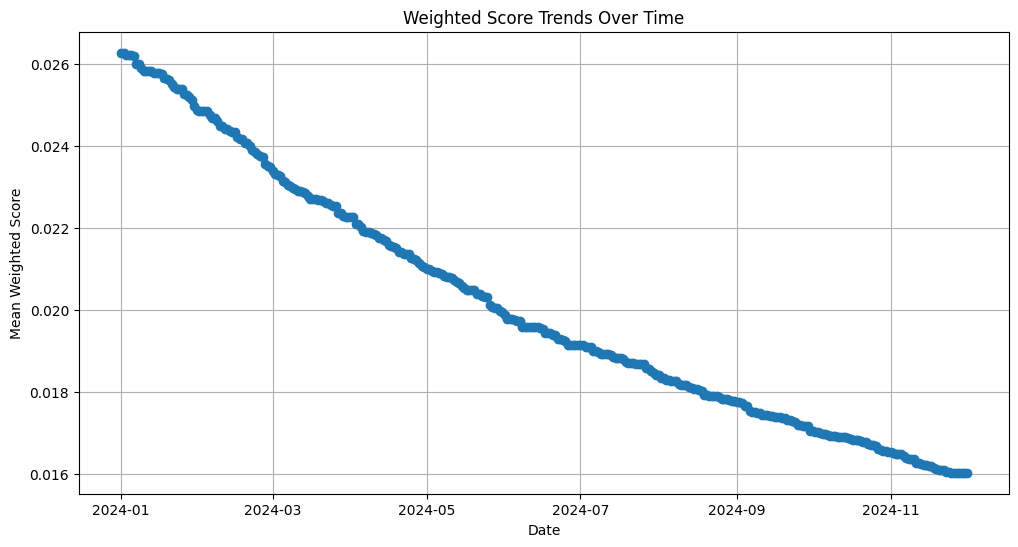

In [24]:
import matplotlib.pyplot as plt


daily_metrics = refined_data.groupby('date').agg({'Weighted_Score': 'mean'}).reset_index()

# Plot Weighted_Score trends
plt.figure(figsize=(12, 6))
plt.plot(daily_metrics['date'], daily_metrics['Weighted_Score'], marker='o')
plt.title('Weighted Score Trends Over Time')
plt.xlabel('Date')
plt.ylabel('Mean Weighted Score')
plt.grid(True)
plt.show()


In [25]:
import pandas as pd

processed_features_path = '/content/processed_features.csv'
top_combined_keywords_path = '/content/top_10_combined_keywords (1).csv'

processed_features = pd.read_csv(processed_features_path)
top_combined_keywords = pd.read_csv(top_combined_keywords_path)


processed_features['keyword'] = processed_features['keyword'].str.lower().str.strip()
top_combined_keywords['Keyword'] = top_combined_keywords['Keyword'].str.lower().str.strip()

merged_data = pd.merge(
    processed_features,
    top_combined_keywords,
    left_on='keyword',
    right_on='Keyword',
    how='inner'
)

print("Merged Dataset Shape:", merged_data.shape)
print("Merged Dataset Preview:")
print(merged_data.head())

output_path = '/content/combined_actionable_data.csv'
merged_data.to_csv(output_path, index=False)
print(f"Combined dataset saved to: {output_path}")


Merged Dataset Shape: (13415, 15)
Merged Dataset Preview:
  keyword  headline_sentiment  abstract_sentiment  lead_paragraph_sentiment  \
0     doe             0.00000              0.0000                  0.230000   
1     doe             0.42500              0.2125                 -0.350000   
2     doe             0.00000              0.2500                  0.250000   
3     doe             0.37500             -0.0200                 -0.187431   
4     doe             0.10625              0.2000                  0.167593   

   consolidated_sentiment  day_of_week  month  hour  is_weekend Keyword  \
0                0.076667            3      5    17           0     doe   
1                0.095833            5      2    22           1     doe   
2                0.166667            1      2    13           0     doe   
3                0.055856            1      3     9           0     doe   
4                0.157948            3      1     0           0     doe   

   TF_IDF_Freque


--- Top Keywords by Weighted Score ---
               Weighted_Score
keyword                      
president            0.644208
donald               0.532737
voter                0.290904
country              0.285874
campaign             0.263806
kamala harris        0.258352
race                 0.244236
year                 0.232949
presidential         0.218969
party                0.207899


<Figure size 1000x600 with 0 Axes>

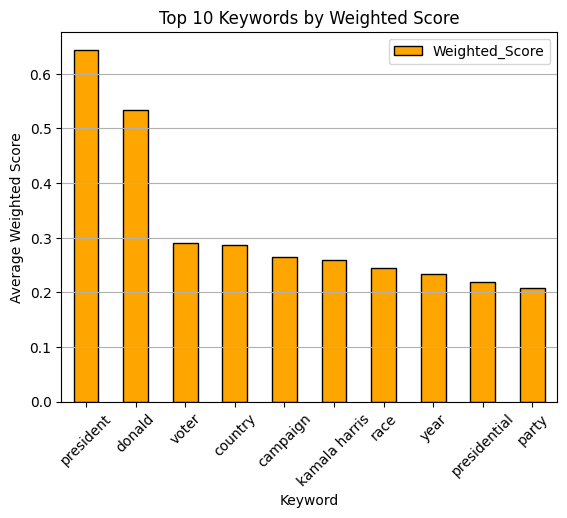

In [26]:
import pandas as pd
import matplotlib.pyplot as plt

file_path = '/content/combined_actionable_data.csv'
data = pd.read_csv(file_path)


data['keyword'] = data['keyword'].astype(str).str.strip()


numeric_data = data.select_dtypes(include=['float64', 'int64'])


cleaned_keyword_data = pd.concat([data['keyword'], numeric_data], axis=1)


cleaned_keyword_data = cleaned_keyword_data[cleaned_keyword_data['keyword'] != '']


top_keywords = (
    cleaned_keyword_data
    .groupby('keyword')
    .mean()[['Weighted_Score']]
    .sort_values(by='Weighted_Score', ascending=False)
    .head(10)
)

print("\n--- Top Keywords by Weighted Score ---")
print(top_keywords)

# Step 4: Visualize Top Keywords
plt.figure(figsize=(10, 6))
top_keywords.plot(kind='bar', color='orange', edgecolor='black')
plt.title("Top 10 Keywords by Weighted Score")
plt.xlabel("Keyword")
plt.ylabel("Average Weighted Score")
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import classification_report, accuracy_score, mean_absolute_error, r2_score


file_path = '/content/combined_actionable_data.csv'
data = pd.read_csv(file_path)


features = ['TF_IDF_Frequency', 'Spacy_Frequency', 'headline_sentiment', 'abstract_sentiment', 'consolidated_sentiment']
X = data[features]
y = data['Weighted_Score']


classification_target = (y > y.median()).astype(int)


X_train, X_test, y_train, y_test = train_test_split(X, classification_target, test_size=0.2, random_state=42)

# Step 3: Train a Classification Model (Random Forest)
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)


print("\n--- Classification Report ---")
print(classification_report(y_test, y_pred))

print("\n--- Accuracy Score ---")
print("Accuracy:", accuracy_score(y_test, y_pred))

importances = model.feature_importances_
feature_importance = pd.DataFrame({'Feature': features, 'Importance': importances}).sort_values(by='Importance', ascending=False)
print("\n--- Feature Importances ---")
print(feature_importance)



--- Classification Report ---
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1390
           1       1.00      1.00      1.00      1293

    accuracy                           1.00      2683
   macro avg       1.00      1.00      1.00      2683
weighted avg       1.00      1.00      1.00      2683


--- Accuracy Score ---
Accuracy: 1.0

--- Feature Importances ---
                  Feature  Importance
0        TF_IDF_Frequency    0.657233
1         Spacy_Frequency    0.332889
2      headline_sentiment    0.004258
4  consolidated_sentiment    0.003490
3      abstract_sentiment    0.002129


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


bins = [0, 0.2, 0.5, 1.0]  # Define bins for Weighted_Score
labels = ['Low', 'Medium', 'High']
multi_class_target = pd.cut(data['Weighted_Score'], bins=bins, labels=labels).astype(str)


X_train, X_test, y_train, y_test = train_test_split(X_scaled, multi_class_target, test_size=0.2, random_state=42)

# Step 4: Train a Gradient Boosting Classifier
from sklearn.ensemble import GradientBoostingClassifier
model = GradientBoostingClassifier(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print("\n--- Classification Report ---")
print(classification_report(y_test, y_pred))

importances = model.feature_importances_
feature_importance = pd.DataFrame({'Feature': features, 'Importance': importances}).sort_values(by='Importance', ascending=False)
print("\n--- Feature Importances ---")
print(feature_importance)



--- Classification Report ---
              precision    recall  f1-score   support

        High       1.00      1.00      1.00        82
         Low       1.00      1.00      1.00      2314
      Medium       1.00      1.00      1.00       287

    accuracy                           1.00      2683
   macro avg       1.00      1.00      1.00      2683
weighted avg       1.00      1.00      1.00      2683


--- Feature Importances ---
                  Feature    Importance
0        TF_IDF_Frequency  7.149971e-01
1         Spacy_Frequency  2.850029e-01
4  consolidated_sentiment  3.496263e-14
3      abstract_sentiment  2.021521e-15
2      headline_sentiment  0.000000e+00


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Load dataset
file_path = '/content/combined_actionable_data.csv'
data = pd.read_csv(file_path)

# Feature selection: Exclude TF_IDF_Frequency and Spacy_Frequency
features = ['headline_sentiment', 'abstract_sentiment', 'consolidated_sentiment']
X = data[features]
y = data['Weighted_Score']

# Multi-class target: Bin Weighted_Score
bins = [0, 0.2, 0.5, 1.0]
labels = ['Low', 'Medium', 'High']
multi_class_target = pd.cut(y, bins=bins, labels=labels).astype(str)

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Address class imbalance using SMOTE
smote = SMOTE(random_state=42)
X_balanced, y_balanced = smote.fit_resample(X_scaled, multi_class_target)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_balanced, y_balanced, test_size=0.2, random_state=42)

# Train a Gradient Boosting Classifier
model = GradientBoostingClassifier(random_state=42)
model.fit(X_train, y_train)

# Evaluate the model
y_pred = model.predict(X_test)
print("\n--- Classification Report ---")
print(classification_report(y_test, y_pred))

# Cross-validation for robustness
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, X_balanced, y_balanced, cv=5)
print("\n--- Cross-Validation Scores ---")
print(scores)



--- Classification Report ---
              precision    recall  f1-score   support

        High       0.57      0.57      0.57      2293
         Low       0.48      0.50      0.49      2317
      Medium       0.49      0.47      0.48      2313

    accuracy                           0.51      6923
   macro avg       0.51      0.51      0.51      6923
weighted avg       0.51      0.51      0.51      6923


--- Cross-Validation Scores ---
[0.49039434 0.51841687 0.52405027 0.50902788 0.5179139 ]


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

file_path = '/content/combined_actionable_data.csv'
data = pd.read_csv(file_path)

features = ['headline_sentiment', 'abstract_sentiment', 'consolidated_sentiment', 'day_of_week', 'hour']
X = data[features]
y = data['Weighted_Score']


bins = [0, 0.2, 0.5, 1.0]
labels = ['Low', 'Medium', 'High']
multi_class_target = pd.cut(y, bins=bins, labels=labels).astype(str)


label_encoder = LabelEncoder()
multi_class_target_encoded = label_encoder.fit_transform(multi_class_target)


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


smote = SMOTE(random_state=42)
X_balanced, y_balanced = smote.fit_resample(X_scaled, multi_class_target_encoded)


X_train, X_test, y_train, y_test = train_test_split(X_balanced, y_balanced, test_size=0.2, random_state=42)


print("\n--- XGBoost Results ---")
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
xgb_model.fit(X_train, y_train)


xgb_pred = xgb_model.predict(X_test)

xgb_probs = xgb_model.predict_proba(X_test)

print("Classification Report (XGBoost):")
print(classification_report(y_test, xgb_pred, target_names=label_encoder.classes_))
print("Accuracy (XGBoost):", accuracy_score(y_test, xgb_pred))


print("\n--- LightGBM Results ---")
lgbm_model = LGBMClassifier(random_state=42)
lgbm_model.fit(X_train, y_train)


lgbm_pred = lgbm_model.predict(X_test)


lgbm_probs = lgbm_model.predict_proba(X_test)

print("Classification Report (LightGBM):")
print(classification_report(y_test, lgbm_pred, target_names=label_encoder.classes_))
print("Accuracy (LightGBM):", accuracy_score(y_test, lgbm_pred))

/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)



--- XGBoost Results ---


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [16:13:35] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Classification Report (XGBoost):
              precision    recall  f1-score   support

        High       0.86      0.88      0.87      2293
         Low       0.77      0.85      0.81      2317
      Medium       0.82      0.71      0.76      2313

    accuracy                           0.81      6923
   macro avg       0.81      0.81      0.81      6923
weighted avg       0.81      0.81      0.81      6923

Accuracy (XGBoost): 0.8119312436804853

--- LightGBM Results ---
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002738 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1274
[LightGBM] [Info] Number of data points in the train set: 27691, number of used features: 5
[LightGBM] [Info] Start training from score -1.097025
[LightGBM] [Info] Start training from score -1.099624
[LightGBM] [Info] Start training from score -1.099190
Classification Report (LightGBM):
              precision    recall  f1

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1],
}
grid_search = GridSearchCV(XGBClassifier(eval_metric='mlogloss', random_state=42), param_grid, cv=5)
grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)


Best Parameters: {'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 200}


In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBClassifier

# Simplified Randomized Search for XGBoost
xgb_param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5],
    'learning_rate': [0.1, 0.2],
    'subsample': [0.8],
}

random_search = RandomizedSearchCV(
    estimator=XGBClassifier(eval_metric='mlogloss', random_state=42),
    param_distributions=xgb_param_grid,
    n_iter=10,  # Reduce iterations for faster search
    scoring='accuracy',
    cv=5,
    verbose=1,
    random_state=42,
    n_jobs=-1
)
random_search.fit(X_train, y_train)

print("Best Parameters:", random_search.best_params_)
print("Best Score:", random_search.best_score_)


Fitting 5 folds for each of 8 candidates, totalling 40 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:320: UserWarning: The total space of parameters 8 is smaller than n_iter=10. Running 8 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Best Parameters: {'subsample': 0.8, 'n_estimators': 200, 'max_depth': 5, 'learning_rate': 0.2}
Best Score: 0.7885234097284882



--- Classification Report ---
              precision    recall  f1-score   support

        High       0.84      0.87      0.85      2293
         Low       0.76      0.85      0.80      2317
      Medium       0.81      0.68      0.74      2313

    accuracy                           0.80      6923
   macro avg       0.80      0.80      0.80      6923
weighted avg       0.80      0.80      0.80      6923


--- Accuracy ---
Accuracy: 0.8002311136790409


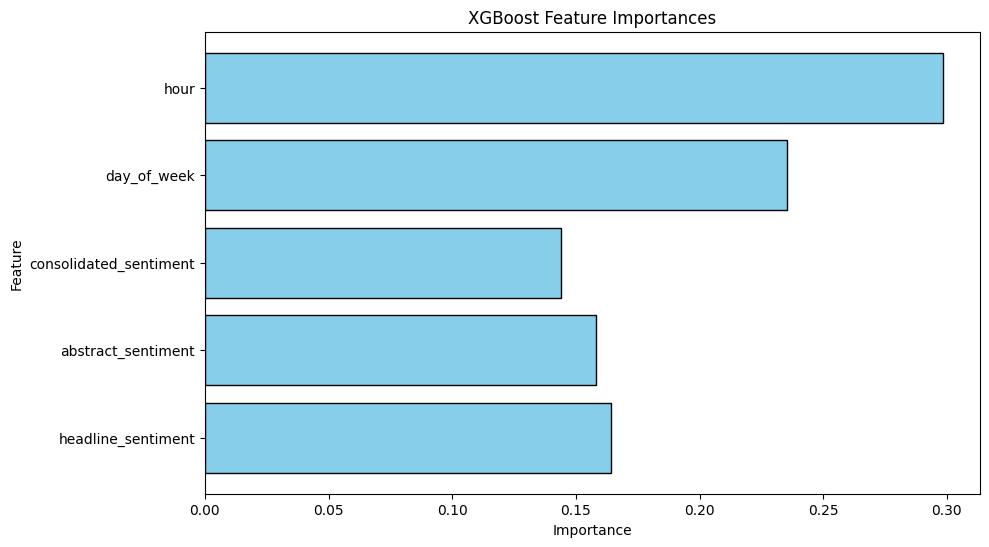

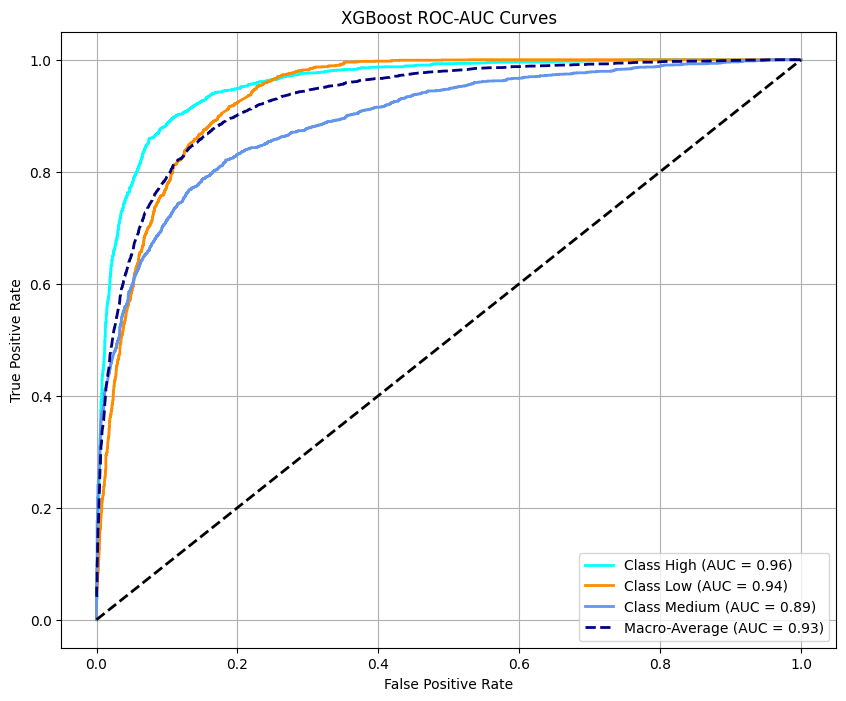

In [ ]:
from sklearn.preprocessing import label_binarize  # Add this import
from sklearn.metrics import classification_report, accuracy_score, roc_curve, auc
import matplotlib.pyplot as plt
from itertools import cycle
import numpy as np

best_xgb_model = XGBClassifier(
    subsample=0.8,
    n_estimators=200,
    max_depth=5,
    learning_rate=0.2,
    eval_metric='mlogloss',
    random_state=42
)
best_xgb_model.fit(X_train, y_train)


y_pred = best_xgb_model.predict(X_test)


y_probs = best_xgb_model.predict_proba(X_test)

print("\n--- Classification Report ---")
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))
print("\n--- Accuracy ---")
print("Accuracy:", accuracy_score(y_test, y_pred))


xgb_importances = best_xgb_model.feature_importances_


plt.figure(figsize=(10, 6))
plt.barh(features, xgb_importances, color='skyblue', edgecolor='black')
plt.title("XGBoost Feature Importances")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()


n_classes = len(label_encoder.classes_)
y_test_binarized = label_binarize(y_test, classes=range(n_classes))


fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_probs[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])


all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])
mean_tpr /= n_classes
roc_auc["macro"] = auc(all_fpr, mean_tpr)


plt.figure(figsize=(10, 8))
colors = cycle(["aqua", "darkorange", "cornflowerblue"])
for i, color in zip(range(n_classes), colors):
    plt.plot(
        fpr[i],
        tpr[i],
        color=color,
        lw=2,
        label=f"Class {label_encoder.classes_[i]} (AUC = {roc_auc[i]:.2f})",
    )
plt.plot(all_fpr, mean_tpr, color="navy", linestyle="--", linewidth=2, label=f"Macro-Average (AUC = {roc_auc['macro']:.2f})")
plt.plot([0, 1], [0, 1], "k--", lw=2)
plt.title("XGBoost ROC-AUC Curves")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.grid()
plt.show()

In [ ]:

from sklearn.utils.class_weight import compute_class_weight
import numpy as np

classes = np.unique(y_train)
class_weights = compute_class_weight(class_weight='balanced', classes=classes, y=y_train)
class_weight_dict = dict(zip(classes, class_weights))


best_xgb_model_weighted = XGBClassifier(
    subsample=0.8,
    n_estimators=200,
    max_depth=5,
    learning_rate=0.2,
    eval_metric='mlogloss',
    scale_pos_weight=class_weights,
    random_state=42
)
best_xgb_model_weighted.fit(X_train, y_train)


y_pred_weighted = best_xgb_model_weighted.predict(X_test)
print("\n--- Weighted Classification Report ---")
print(classification_report(y_test, y_pred_weighted, target_names=label_encoder.classes_))
print("\n--- Weighted Accuracy ---")
print("Accuracy:", accuracy_score(y_test, y_pred_weighted))


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [16:35:09] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "scale_pos_weight" } are not used.

  warnings.warn(smsg, UserWarning)



--- Weighted Classification Report ---
              precision    recall  f1-score   support

        High       0.84      0.87      0.85      2293
         Low       0.76      0.85      0.80      2317
      Medium       0.81      0.68      0.74      2313

    accuracy                           0.80      6923
   macro avg       0.80      0.80      0.80      6923
weighted avg       0.80      0.80      0.80      6923


--- Weighted Accuracy ---
Accuracy: 0.8002311136790409


In [ ]:
!pip install catboost
!pip install SVC

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 8.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for SVC: filename=SVC-0.1-py3-none-any.whl size=1868 sha256=81ee2fb3b2ea482b25376c97bfd1a8b6a768762f81947dd93dfec5eb039f7586
  Stored in directory: /root/.cache/pip/wheels/88/51/46/316b33cfa9e39d0749762daa17b6a8646e3050079185747370
Successfully built SVC



--- CatBoost Results ---
Classification Report (CatBoost):
              precision    recall  f1-score   support

        High       0.75      0.78      0.77      2293
         Low       0.69      0.88      0.77      2317
      Medium       0.74      0.52      0.61      2313

    accuracy                           0.73      6923
   macro avg       0.73      0.73      0.72      6923
weighted avg       0.73      0.73      0.72      6923

Accuracy (CatBoost): 0.7256969521883576

--- SVM Results ---
Classification Report (SVM):
              precision    recall  f1-score   support

        High       0.49      0.72      0.59      2293
         Low       0.54      0.30      0.38      2317
      Medium       0.49      0.49      0.49      2313

    accuracy                           0.50      6923
   macro avg       0.51      0.50      0.49      6923
weighted avg       0.51      0.50      0.49      6923

Accuracy (SVM): 0.500794453271703


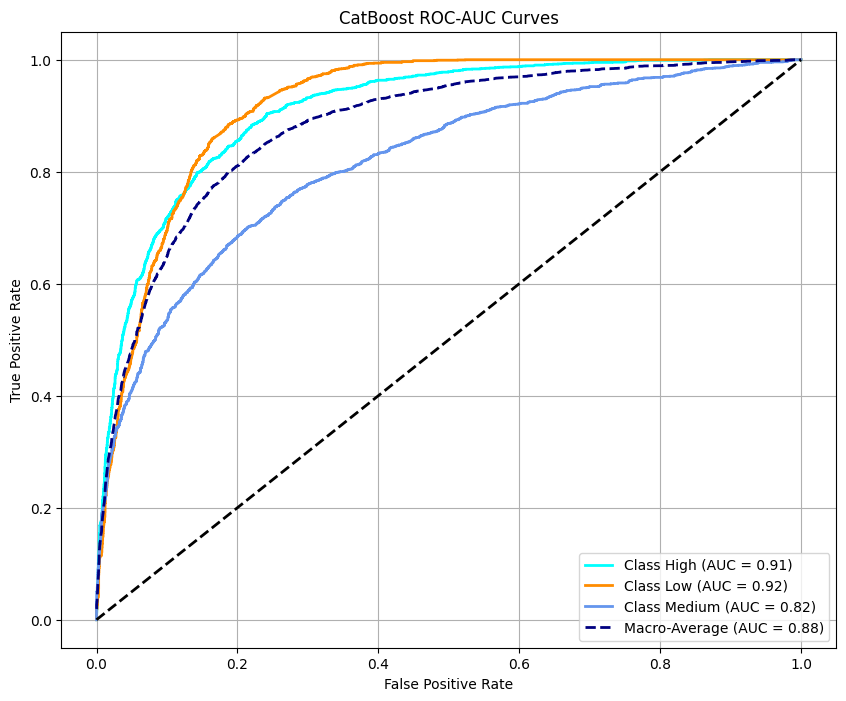

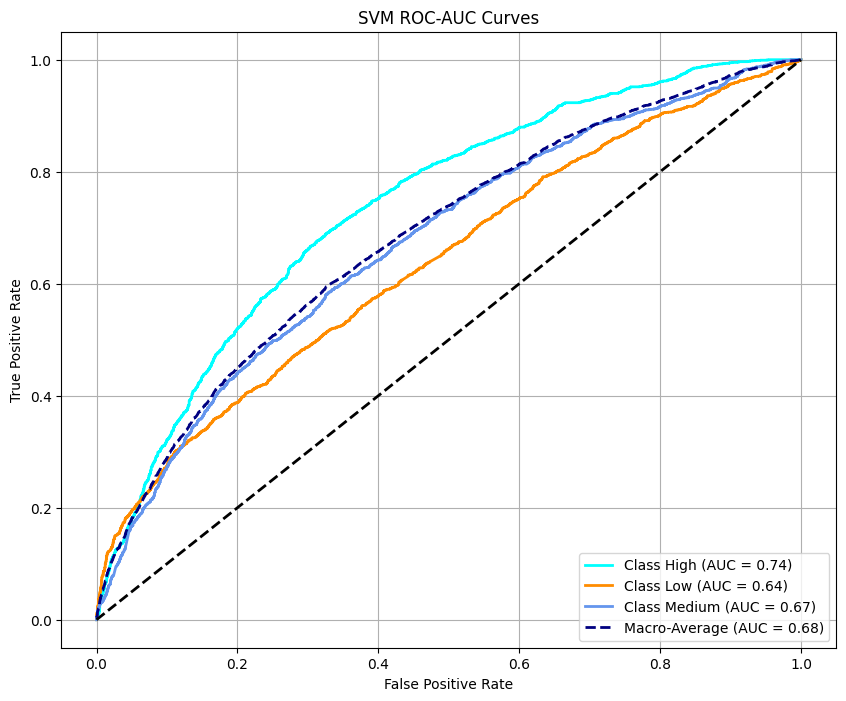

In [ ]:
from catboost import CatBoostClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
import numpy as np
from itertools import cycle

print("\n--- CatBoost Results ---")
catboost_model = CatBoostClassifier(
    iterations=200,
    depth=6,
    learning_rate=0.1,
    random_seed=42,
    verbose=False
)
catboost_model.fit(X_train, y_train)

catboost_pred = catboost_model.predict(X_test)

catboost_probs = catboost_model.predict_proba(X_test)

print("Classification Report (CatBoost):")
print(classification_report(y_test, catboost_pred, target_names=label_encoder.classes_))
print("Accuracy (CatBoost):", accuracy_score(y_test, catboost_pred))

print("\n--- SVM Results ---")
svm_model = SVC(kernel='rbf', C=1, gamma='scale', probability=True, random_state=42)
svm_model.fit(X_train, y_train)

svm_pred = svm_model.predict(X_test)


svm_probs = svm_model.predict_proba(X_test)

print("Classification Report (SVM):")
print(classification_report(y_test, svm_pred, target_names=label_encoder.classes_))
print("Accuracy (SVM):", accuracy_score(y_test, svm_pred))


n_classes = len(label_encoder.classes_)
y_test_binarized = label_binarize(y_test, classes=range(n_classes))

def plot_roc_auc(model_name, y_test_binarized, y_probs):
    fpr = dict()
    tpr = dict()
    roc_auc = dict()

    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_probs[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))
    mean_tpr = np.zeros_like(all_fpr)
    for i in range(n_classes):
        mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])
    mean_tpr /= n_classes
    roc_auc["macro"] = auc(all_fpr, mean_tpr)

    plt.figure(figsize=(10, 8))
    colors = cycle(["aqua", "darkorange", "cornflowerblue"])
    for i, color in zip(range(n_classes), colors):
        plt.plot(
            fpr[i],
            tpr[i],
            color=color,
            lw=2,
            label=f"Class {label_encoder.classes_[i]} (AUC = {roc_auc[i]:.2f})",
        )
    plt.plot(all_fpr, mean_tpr, color="navy", linestyle="--", linewidth=2, label=f"Macro-Average (AUC = {roc_auc['macro']:.2f})")
    plt.plot([0, 1], [0, 1], "k--", lw=2)
    plt.title(f"{model_name} ROC-AUC Curves")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.legend(loc="lower right")
    plt.grid()
    plt.show()

# Plot ROC-AUC for CatBoost
plot_roc_auc("CatBoost", y_test_binarized, catboost_probs)

# Plot ROC-AUC for SVM
plot_roc_auc("SVM", y_test_binarized, svm_probs)

In [ ]:
print("Classification Report (CatBoost):")
print(classification_report(y_test, catboost_pred, target_names=label_encoder.classes_))
print("Accuracy (CatBoost):", round(accuracy_score(y_test, catboost_pred),3))

print("Classification Report (SVM):")
print(classification_report(y_test, svm_pred, target_names=label_encoder.classes_))
print("Accuracy (SVM):", round(accuracy_score(y_test, svm_pred),3))


Classification Report (CatBoost):
              precision    recall  f1-score   support

        High       0.75      0.78      0.77      2293
         Low       0.69      0.88      0.77      2317
      Medium       0.74      0.52      0.61      2313

    accuracy                           0.73      6923
   macro avg       0.73      0.73      0.72      6923
weighted avg       0.73      0.73      0.72      6923

Accuracy (CatBoost): 0.726
Classification Report (SVM):
              precision    recall  f1-score   support

        High       0.49      0.72      0.59      2293
         Low       0.54      0.30      0.38      2317
      Medium       0.49      0.49      0.49      2313

    accuracy                           0.50      6923
   macro avg       0.51      0.50      0.49      6923
weighted avg       0.51      0.50      0.49      6923

Accuracy (SVM): 0.501



--- Ensemble Model Classification Report ---
              precision    recall  f1-score   support

        High       0.83      0.86      0.85      2293
         Low       0.75      0.88      0.81      2317
      Medium       0.82      0.65      0.72      2313

    accuracy                           0.80      6923
   macro avg       0.80      0.80      0.79      6923
weighted avg       0.80      0.80      0.79      6923


--- Ensemble Model Accuracy ---
Accuracy: 0.7954643940488227


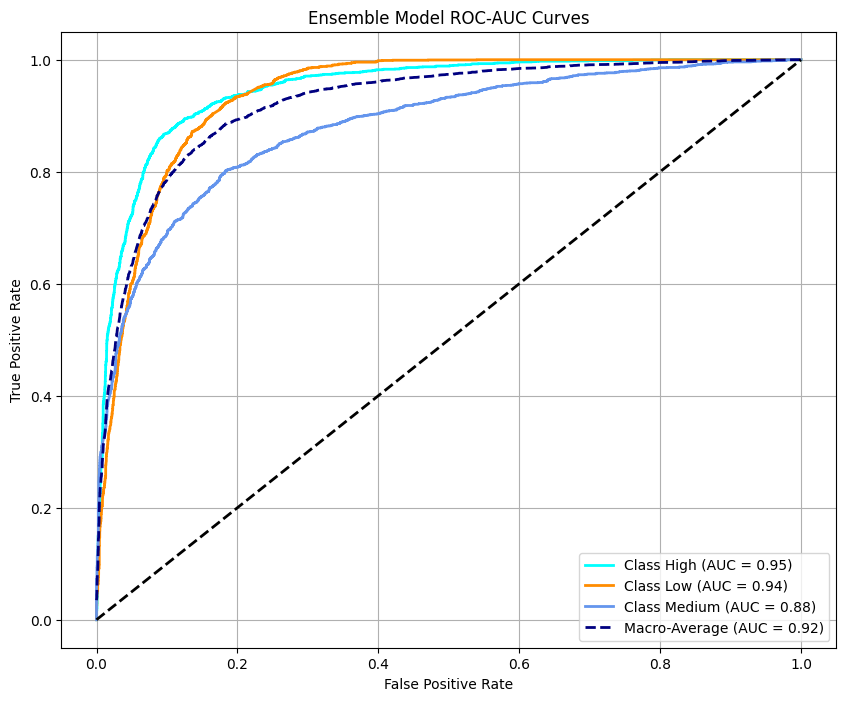

In [ ]:
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import classification_report, accuracy_score, roc_curve, auc
from sklearn.preprocessing import label_binarize
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
import matplotlib.pyplot as plt
import numpy as np
from itertools import cycle


catboost_model = CatBoostClassifier(
    iterations=200,
    depth=6,
    learning_rate=0.1,
    random_seed=42,
    verbose=False
)

xgb_model = XGBClassifier(
    subsample=0.8,
    n_estimators=200,
    max_depth=5,
    learning_rate=0.2,
    eval_metric='mlogloss',
    random_state=42
)


ensemble_model = VotingClassifier(
    estimators=[
        ('catboost', catboost_model),
        ('xgb', xgb_model)
    ],
    voting='soft'
)


ensemble_model.fit(X_train, y_train)


y_pred_ensemble = ensemble_model.predict(X_test)


y_probs_ensemble = ensemble_model.predict_proba(X_test)

print("\n--- Ensemble Model Classification Report ---")
print(classification_report(y_test, y_pred_ensemble, target_names=label_encoder.classes_))
print("\n--- Ensemble Model Accuracy ---")
print("Accuracy:", accuracy_score(y_test, y_pred_ensemble))


n_classes = len(label_encoder.classes_)
y_test_binarized = label_binarize(y_test, classes=range(n_classes))


def plot_roc_auc(model_name, y_test_binarized, y_probs):
    fpr = dict()
    tpr = dict()
    roc_auc = dict()

    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_probs[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))
    mean_tpr = np.zeros_like(all_fpr)
    for i in range(n_classes):
        mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])
    mean_tpr /= n_classes
    roc_auc["macro"] = auc(all_fpr, mean_tpr)

    plt.figure(figsize=(10, 8))
    colors = cycle(["aqua", "darkorange", "cornflowerblue"])
    for i, color in zip(range(n_classes), colors):
        plt.plot(
            fpr[i],
            tpr[i],
            color=color,
            lw=2,
            label=f"Class {label_encoder.classes_[i]} (AUC = {roc_auc[i]:.2f})",
        )
    plt.plot(all_fpr, mean_tpr, color="navy", linestyle="--", linewidth=2, label=f"Macro-Average (AUC = {roc_auc['macro']:.2f})")
    plt.plot([0, 1], [0, 1], "k--", lw=2)
    plt.title(f"{model_name} ROC-AUC Curves")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.legend(loc="lower right")
    plt.grid()
    plt.show()

plot_roc_auc("Ensemble Model", y_test_binarized, y_probs_ensemble)

In [ ]:
print("\n--- Ensemble Model Accuracy ---")
print("Accuracy:", round(accuracy_score(y_test, y_pred_ensemble),3))


--- Ensemble Model Accuracy ---
Accuracy: 0.795


In [ ]:
from sklearn.ensemble import VotingClassifier, StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from catboost import CatBoostClassifier
from xgboost import XGBClassifier

catboost_model = CatBoostClassifier(
    iterations=200,
    depth=6,
    learning_rate=0.1,
    random_seed=42,
    verbose=False
)

xgb_model = XGBClassifier(
    subsample=0.8,
    n_estimators=200,
    max_depth=5,
    learning_rate=0.2,
    eval_metric='mlogloss',
    random_state=42
)


print("\n--- Weighted Ensemble Results ---")
weighted_ensemble_model = VotingClassifier(
    estimators=[
        ('catboost', catboost_model),
        ('xgb', xgb_model)
    ],
    voting='soft',
    weights=[2, 1]  # Giving CatBoost higher weight
)
weighted_ensemble_model.fit(X_train, y_train)


y_pred_weighted = weighted_ensemble_model.predict(X_test)
print("Classification Report (Weighted Ensemble):")
print(classification_report(y_test, y_pred_weighted, target_names=label_encoder.classes_))
print("Accuracy (Weighted Ensemble):", accuracy_score(y_test, y_pred_weighted))


print("\n--- Stacking Ensemble Results ---")
stacking_model = StackingClassifier(
    estimators=[
        ('catboost', catboost_model),
        ('xgb', xgb_model)
    ],
    final_estimator=LogisticRegression(max_iter=1000)
)
stacking_model.fit(X_train, y_train)

y_pred_stacking = stacking_model.predict(X_test)
print("Classification Report (Stacking Ensemble):")
print(classification_report(y_test, y_pred_stacking, target_names=label_encoder.classes_))
print("Accuracy (Stacking Ensemble):", accuracy_score(y_test, y_pred_stacking))



--- Weighted Ensemble Results ---
Classification Report (Weighted Ensemble):
              precision    recall  f1-score   support

        High       0.82      0.84      0.83      2293
         Low       0.73      0.89      0.80      2317
      Medium       0.81      0.62      0.70      2313

    accuracy                           0.78      6923
   macro avg       0.79      0.78      0.78      6923
weighted avg       0.79      0.78      0.78      6923

Accuracy (Weighted Ensemble): 0.7821753575039723

--- Stacking Ensemble Results ---
Classification Report (Stacking Ensemble):
              precision    recall  f1-score   support

        High       0.85      0.86      0.86      2293
         Low       0.78      0.84      0.81      2317
      Medium       0.79      0.72      0.75      2313

    accuracy                           0.81      6923
   macro avg       0.81      0.81      0.81      6923
weighted avg       0.81      0.81      0.81      6923

Accuracy (Stacking Ensemble): 0.8

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001604 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1274
[LightGBM] [Info] Number of data points in the train set: 27691, number of used features: 5
[LightGBM] [Info] Start training from score -1.097025
[LightGBM] [Info] Start training from score -1.099624
[LightGBM] [Info] Start training from score -1.099190


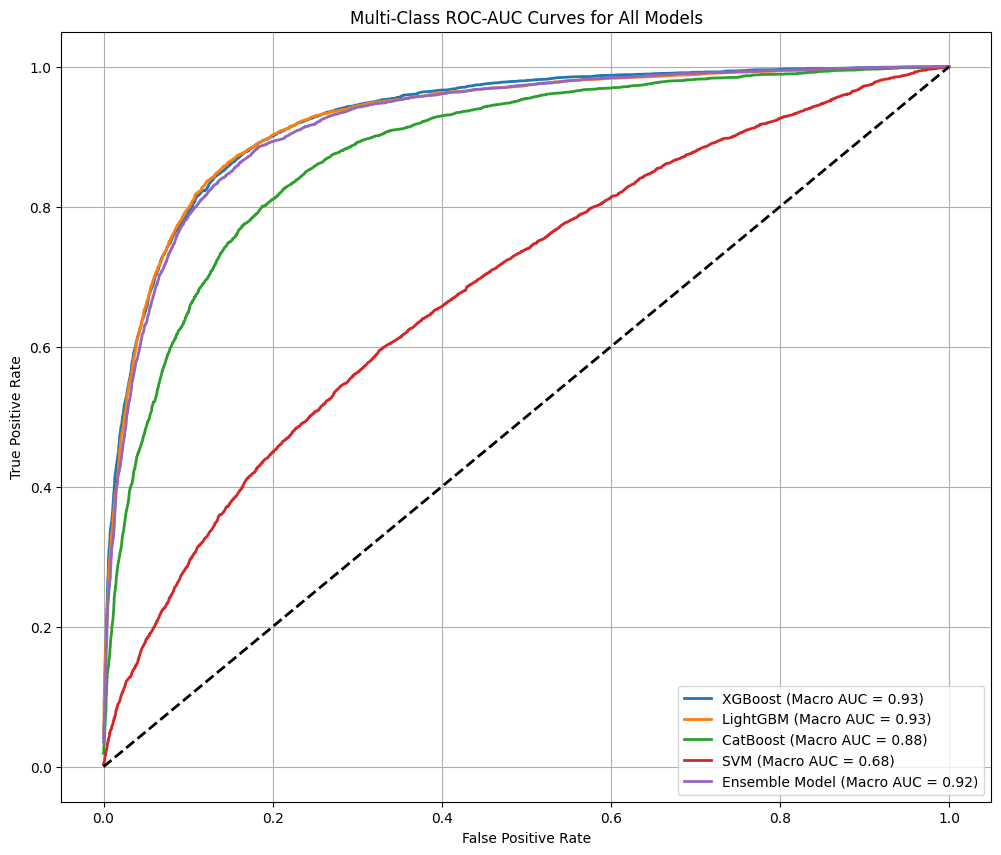

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from itertools import cycle
import numpy as np


best_xgb_model.fit(X_train, y_train)
lgbm_model.fit(X_train, y_train)
catboost_model.fit(X_train, y_train)
svm_model.fit(X_train, y_train)
ensemble_model.fit(X_train, y_train)

models = {
    "XGBoost": best_xgb_model.predict_proba(X_test),
    "LightGBM": lgbm_model.predict_proba(X_test),
    "CatBoost": catboost_model.predict_proba(X_test),
    "SVM": svm_model.predict_proba(X_test),
    "Ensemble Model": ensemble_model.predict_proba(X_test),
}


n_classes = len(label_encoder.classes_)
y_test_binarized = label_binarize(y_test, classes=range(n_classes))


plt.figure(figsize=(12, 10))
for model_name, y_probs in models.items():
    fpr = dict()
    tpr = dict()
    roc_auc = dict()

    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_probs[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))
    mean_tpr = np.zeros_like(all_fpr)
    for i in range(n_classes):
        mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])
    mean_tpr /= n_classes
    roc_auc["macro"] = auc(all_fpr, mean_tpr)

    plt.plot(
        all_fpr,
        mean_tpr,
        lw=2,
        label=f"{model_name} (Macro AUC = {roc_auc['macro']:.2f})",
    )


plt.plot([0, 1], [0, 1], "k--", lw=2)


plt.title("Multi-Class ROC-AUC Curves for All Models")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.grid()
plt.show()

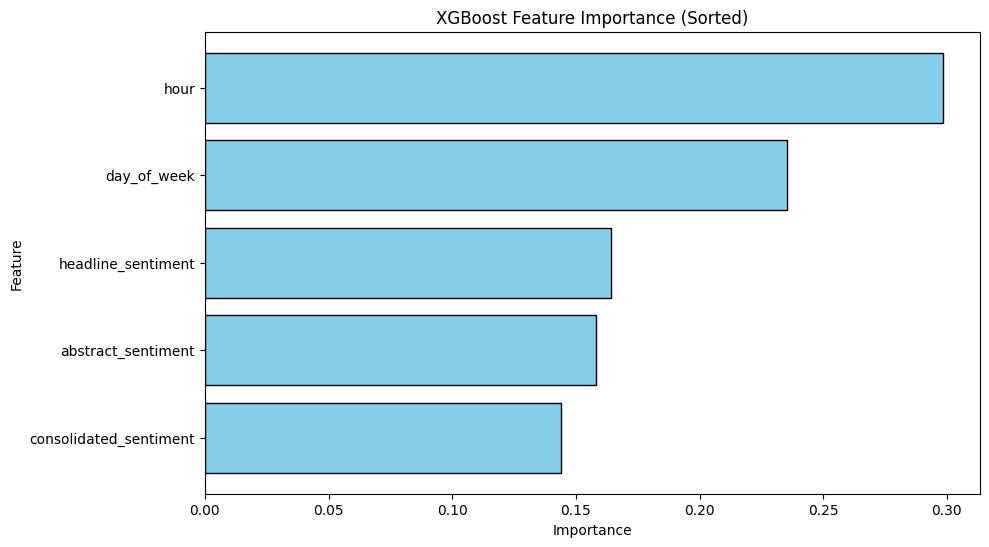

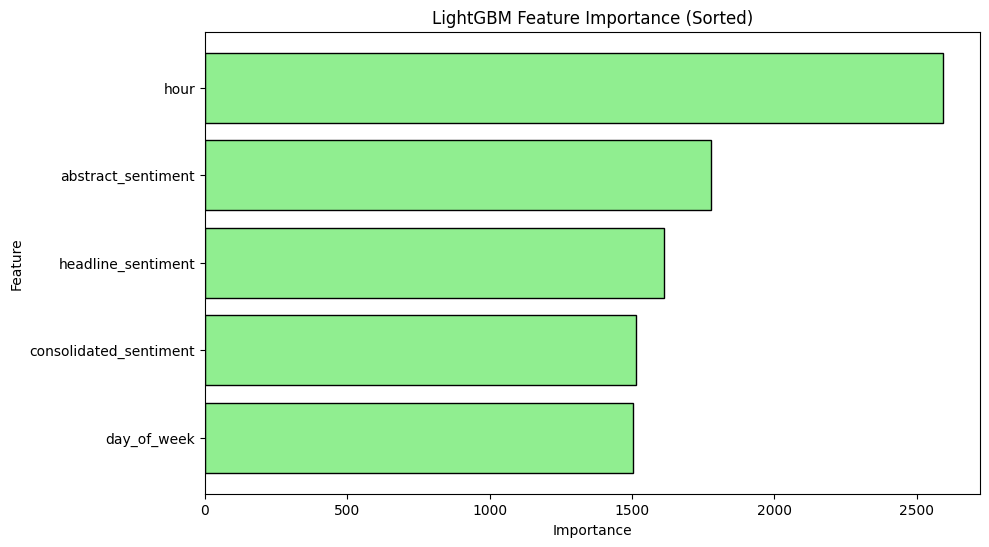


--- XGBoost Feature Importance ---
                  Feature  Importance
4                    hour    0.298444
3             day_of_week    0.235192
0      headline_sentiment    0.164129
1      abstract_sentiment    0.158262
2  consolidated_sentiment    0.143973

--- LightGBM Feature Importance ---
                  Feature  Importance
4                    hour        2592
1      abstract_sentiment        1777
0      headline_sentiment        1611
2  consolidated_sentiment        1515
3             day_of_week        1505


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

xgb_importances = best_xgb_model.feature_importances_
xgb_feature_importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': xgb_importances
}).sort_values(by='Importance', ascending=False)


lgbm_importances = lgbm_model.feature_importances_
lgbm_feature_importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': lgbm_importances
}).sort_values(by='Importance', ascending=False)


plt.figure(figsize=(10, 6))
plt.barh(xgb_feature_importance_df['Feature'], xgb_feature_importance_df['Importance'], color='skyblue', edgecolor='black')
plt.gca().invert_yaxis()
plt.title("XGBoost Feature Importance (Sorted)")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()

plt.figure(figsize=(10, 6))
plt.barh(lgbm_feature_importance_df['Feature'], lgbm_feature_importance_df['Importance'], color='lightgreen', edgecolor='black')
plt.gca().invert_yaxis()
plt.title("LightGBM Feature Importance (Sorted)")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()

print("\n--- XGBoost Feature Importance ---")
print(xgb_feature_importance_df)

print("\n--- LightGBM Feature Importance ---")
print(lgbm_feature_importance_df)


--- Training Stacked Ensemble Model ---
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001733 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1274
[LightGBM] [Info] Number of data points in the train set: 27691, number of used features: 5
[LightGBM] [Info] Start training from score -1.097025
[LightGBM] [Info] Start training from score -1.099624
[LightGBM] [Info] Start training from score -1.099190
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, 

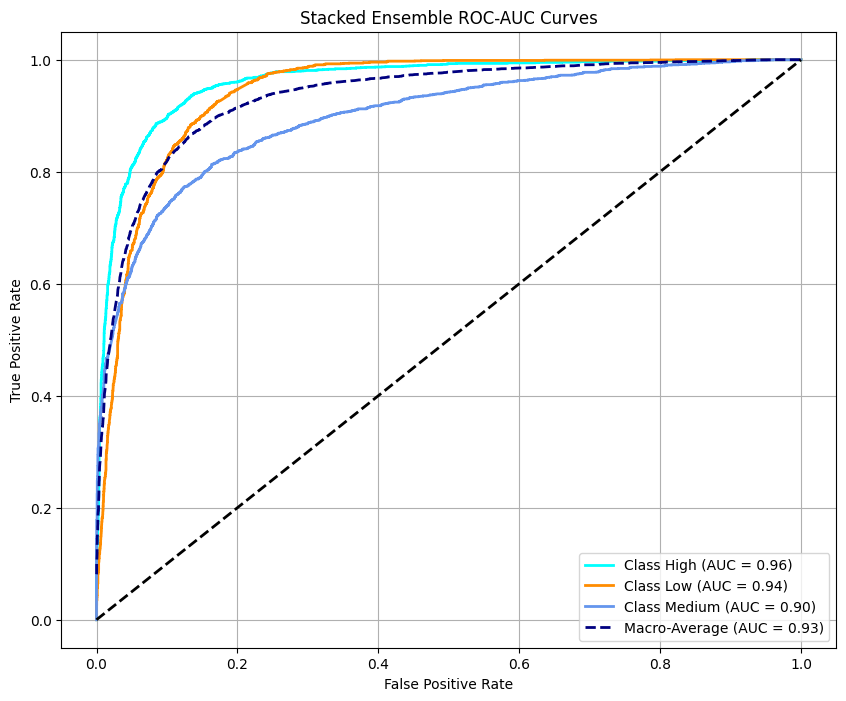

In [ ]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
import numpy as np
from itertools import cycle

xgb_model = XGBClassifier(
    subsample=0.8,
    n_estimators=200,
    max_depth=5,
    learning_rate=0.2,
    eval_metric='mlogloss',
    random_state=42
)

lgbm_model = LGBMClassifier(
    n_estimators=200,
    max_depth=5,
    learning_rate=0.1,
    random_state=42
)

catboost_model = CatBoostClassifier(
    iterations=200,
    depth=6,
    learning_rate=0.1,
    random_seed=42,
    verbose=False
)

meta_model = LogisticRegression(max_iter=1000, random_state=42)
stacked_model = StackingClassifier(
    estimators=[
        ('xgb', xgb_model),
        ('lgbm', lgbm_model),
        ('catboost', catboost_model)
    ],
    final_estimator=meta_model,
    cv=5
)

print("\n--- Training Stacked Ensemble Model ---")
stacked_model.fit(X_train, y_train)

y_pred_stacked = stacked_model.predict(X_test)
y_probs_stacked = stacked_model.predict_proba(X_test)

print("\n--- Stacked Ensemble Model Classification Report ---")
print(classification_report(y_test, y_pred_stacked, target_names=label_encoder.classes_))
print("\n--- Stacked Ensemble Model Accuracy ---")
print("Accuracy:", accuracy_score(y_test, y_pred_stacked))

n_classes = len(label_encoder.classes_)
y_test_binarized = label_binarize(y_test, classes=range(n_classes))

fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_probs_stacked[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])
mean_tpr /= n_classes
roc_auc["macro"] = auc(all_fpr, mean_tpr)


plt.figure(figsize=(10, 8))
colors = cycle(["aqua", "darkorange", "cornflowerblue"])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label=f"Class {label_encoder.classes_[i]} (AUC = {roc_auc[i]:.2f})")
plt.plot(all_fpr, mean_tpr, color="navy", linestyle="--", linewidth=2,
         label=f"Macro-Average (AUC = {roc_auc['macro']:.2f})")
plt.plot([0, 1], [0, 1], "k--", lw=2)
plt.title("Stacked Ensemble ROC-AUC Curves")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.grid()
plt.show()

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],  # Regularization strength
    'solver': ['lbfgs', 'liblinear', 'saga']  # Solvers
}

meta_model = LogisticRegression(max_iter=1000, random_state=42)
grid_search = GridSearchCV(meta_model, param_grid, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)

stacked_model = StackingClassifier(
    estimators=[
        ('xgb', xgb_model),
        ('lgbm', lgbm_model),
        ('catboost', catboost_model)
    ],
    final_estimator=meta_model,
    cv=5
)

print("\n--- Fine-Tuning Meta-Model (Logistic Regression) ---")
grid_search.fit(X_train, y_train)

print("Best Meta-Model Parameters:", grid_search.best_params_)


final_meta_model = LogisticRegression(**grid_search.best_params_, max_iter=1000)
stacked_model = StackingClassifier(
    estimators=[
        ('xgb', xgb_model),
        ('lgbm', lgbm_model),
        ('catboost', catboost_model)
    ],
    final_estimator=final_meta_model,
    cv=5
)

stacked_model.fit(X_train, y_train)
y_pred_stacked = stacked_model.predict(X_test)

print("\n--- Fine-Tuned Stacked Ensemble Classification Report ---")
print(classification_report(y_test, y_pred_stacked, target_names=label_encoder.classes_))
print("Accuracy:", accuracy_score(y_test, y_pred_stacked))


--- Fine-Tuning Meta-Model (Logistic Regression) ---
Fitting 5 folds for each of 15 candidates, totalling 75 fits
Best Meta-Model Parameters: {'C': 0.1, 'solver': 'liblinear'}
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001741 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1274
[LightGBM] [Info] Number of data points in the train set: 27691, number of used features: 5
[LightGBM] [Info] Start training from score -1.097025
[LightGBM] [Info] Start training from score -1.099624
[LightGBM] [Info] Start training from score -1.099190
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -in

In [ ]:
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import classification_report, accuracy_score

weighted_ensemble = VotingClassifier(
    estimators=[
        ('xgb', xgb_model),
        ('lgbm', lgbm_model),
        ('catboost', catboost_model)
    ],
    voting='soft',
    weights=[2, 2, 1]
)

print("\n--- Training Weighted Voting Ensemble ---")
weighted_ensemble.fit(X_train, y_train)


y_pred_weighted = weighted_ensemble.predict(X_test)


print("\n--- Weighted Voting Ensemble Classification Report ---")
print(classification_report(y_test, y_pred_weighted, target_names=label_encoder.classes_))
print("\n--- Weighted Voting Ensemble Accuracy ---")
print("Accuracy:", accuracy_score(y_test, y_pred_weighted))


--- Training Weighted Voting Ensemble ---
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001486 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1274
[LightGBM] [Info] Number of data points in the train set: 27691, number of used features: 5
[LightGBM] [Info] Start training from score -1.097025
[LightGBM] [Info] Start training from score -1.099624
[LightGBM] [Info] Start training from score -1.099190
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain

In [ ]:
from xgboost import XGBClassifier

# Define and train the model
xgb_model = XGBClassifier(
    subsample=0.8,
    n_estimators=200,
    max_depth=5,
    learning_rate=0.2,
    eval_metric='mlogloss',
    random_state=42
)

# Fit the model
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.2, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=5,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=200,
              n_jobs=None, num_parallel_tree=None, objective='multi:softprob', ...)

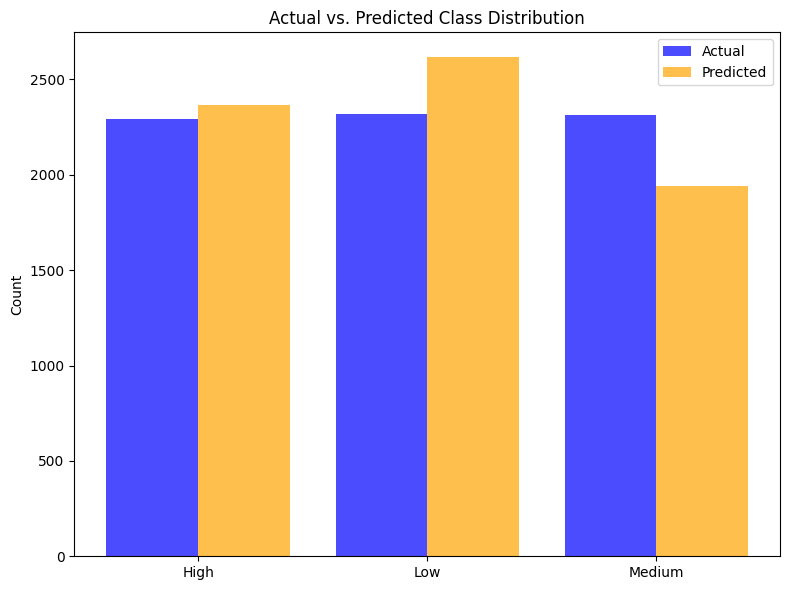

In [ ]:
import numpy as np

# Count actual and predicted values for each class
actual_counts = np.bincount(y_test)
predicted_counts = np.bincount(xgb_predictions)

# Bar plot
classes = label_encoder.classes_  # ['Low', 'Medium', 'High']
x = np.arange(len(classes))

plt.figure(figsize=(8, 6))
plt.bar(x - 0.2, actual_counts, width=0.4, label='Actual', color='blue', alpha=0.7)
plt.bar(x + 0.2, predicted_counts, width=0.4, label='Predicted', color='orange', alpha=0.7)
plt.xticks(x, classes)
plt.title('Actual vs. Predicted Class Distribution')
plt.ylabel('Count')
plt.legend()
plt.tight_layout()
plt.show()

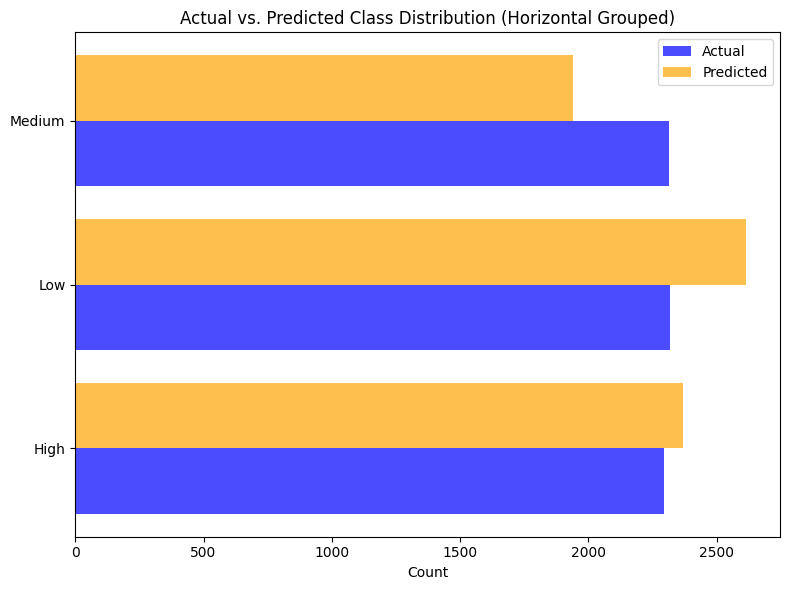

In [ ]:
# Horizontal Grouped Bar Chart for Actual vs. Predicted Values
classes = label_encoder.classes_  # ['Low', 'Medium', 'High']
actual_counts = np.bincount(y_test)
predicted_counts = np.bincount(xgb_predictions)

# Plotting
fig, ax = plt.subplots(figsize=(8, 6))
bar_width = 0.4
y_positions = np.arange(len(classes))

ax.barh(y_positions - bar_width / 2, actual_counts, bar_width, label='Actual', color='blue', alpha=0.7)
ax.barh(y_positions + bar_width / 2, predicted_counts, bar_width, label='Predicted', color='orange', alpha=0.7)

# Adding labels and titles
ax.set_yticks(y_positions)
ax.set_yticklabels(classes)
ax.set_xlabel('Count')
ax.set_title('Actual vs. Predicted Class Distribution (Horizontal Grouped)')
ax.legend()
plt.tight_layout()
plt.show()

In [ ]:
import pandas as pd

# Combine actual and predicted values into a single dataset
data = pd.DataFrame({
    'Actual': y_test,
    'Predicted': xgb_predictions
})

# Add a difference column (optional, for clustering based on deviations)
data['Difference'] = data['Predicted'] - data['Actual']

# Display the first few rows
print(data.head())

   Actual  Predicted  Difference
0       0          0           0
1       2          2           0
2       2          1          -1
3       2          2           0
4       1          1           0


In [ ]:
# Total counts for correct and incorrect classifications
correct_high = ((y_test == 2) & (xgb_predictions == 2)).sum()
correct_medium = ((y_test == 1) & (xgb_predictions == 1)).sum()
correct_low = ((y_test == 0) & (xgb_predictions == 0)).sum()

misclassified_high = ((y_test == 2) & (xgb_predictions != 2)).sum()
misclassified_medium = ((y_test == 1) & (xgb_predictions != 1)).sum()
misclassified_low = ((y_test == 0) & (xgb_predictions != 0)).sum()

# Calculate costs and benefits
total_benefit = (correct_high * 200000) + (correct_medium * 75000) + (correct_low * 25000)
total_cost = (misclassified_high * 100000) + (misclassified_medium * 50000) + (misclassified_low * 25000)

# Display results
print("Total Benefit: $", total_benefit)
print("Total Cost: $", total_cost)

Total Benefit: $ 513325000
Total Cost: $ 98275000


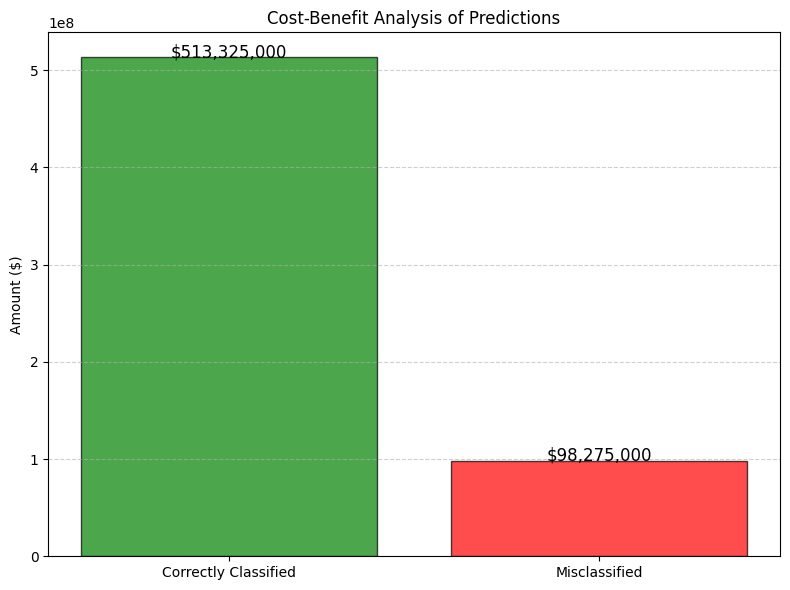

In [ ]:
import matplotlib.pyplot as plt

# Data for the chart
categories = ['Correctly Classified', 'Misclassified']
values = [total_benefit, total_cost]

# Plotting
plt.figure(figsize=(8, 6))
plt.bar(categories, values, color=['green', 'red'], alpha=0.7, edgecolor='black')
plt.title('Cost-Benefit Analysis of Predictions')
plt.ylabel('Amount ($)')
plt.grid(axis='y', linestyle='--', alpha=0.6)

# Add value annotations
for i, v in enumerate(values):
    plt.text(i, v + 50000, f'${v:,.0f}', ha='center', fontsize=12)

plt.tight_layout()
plt.show()

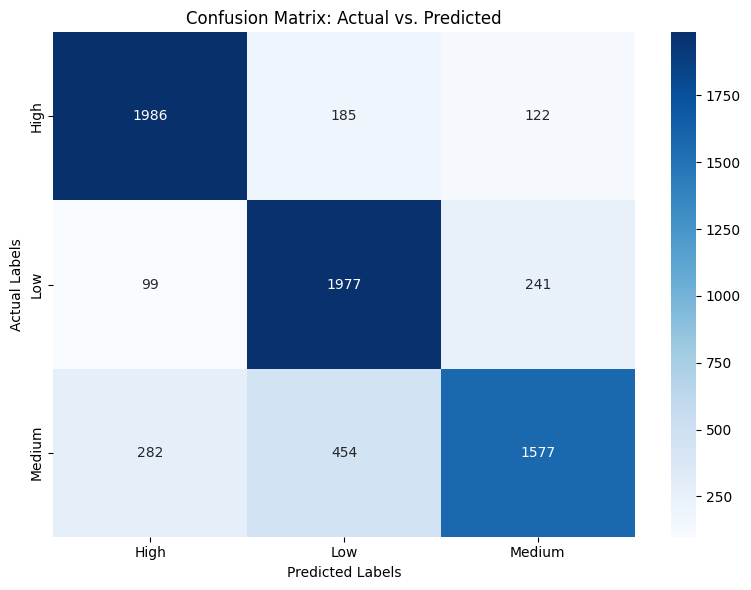

In [ ]:
#XGBoost Confusion Matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Generate confusion matrix
cm = confusion_matrix(y_test, xgb_predictions)
classes = label_encoder.classes_  # ['Low', 'Medium', 'High']

# Plot confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
plt.title('Confusion Matrix: Actual vs. Predicted')
plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')
plt.tight_layout()
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Example counts from confusion matrix
correct_high = ((y_test == 2) & (xgb_predictions == 2)).sum()
correct_medium = ((y_test == 1) & (xgb_predictions == 1)).sum()
correct_low = ((y_test == 0) & (xgb_predictions == 0)).sum()

misclassified_high = ((y_test == 2) & (xgb_predictions != 2)).sum()
misclassified_medium = ((y_test == 1) & (xgb_predictions != 1)).sum()
misclassified_low = ((y_test == 0) & (xgb_predictions != 0)).sum()

# Benefits
benefit_high = correct_high * 200000
benefit_medium = correct_medium * 75000
benefit_low = correct_low * 25000

# Costs
cost_high = misclassified_high * 100000
cost_medium = misclassified_medium * 50000
cost_low = misclassified_low * 25000

# Net profit
total_benefit = benefit_high + benefit_medium + benefit_low
total_cost = cost_high + cost_medium + cost_low
net_profit = total_benefit - total_cost

# Display values
print("Benefits: ", total_benefit)
print("Costs: ", total_cost)
print("Net Profit: ", net_profit)

Benefits:  513325000
Costs:  98275000
Net Profit:  415050000


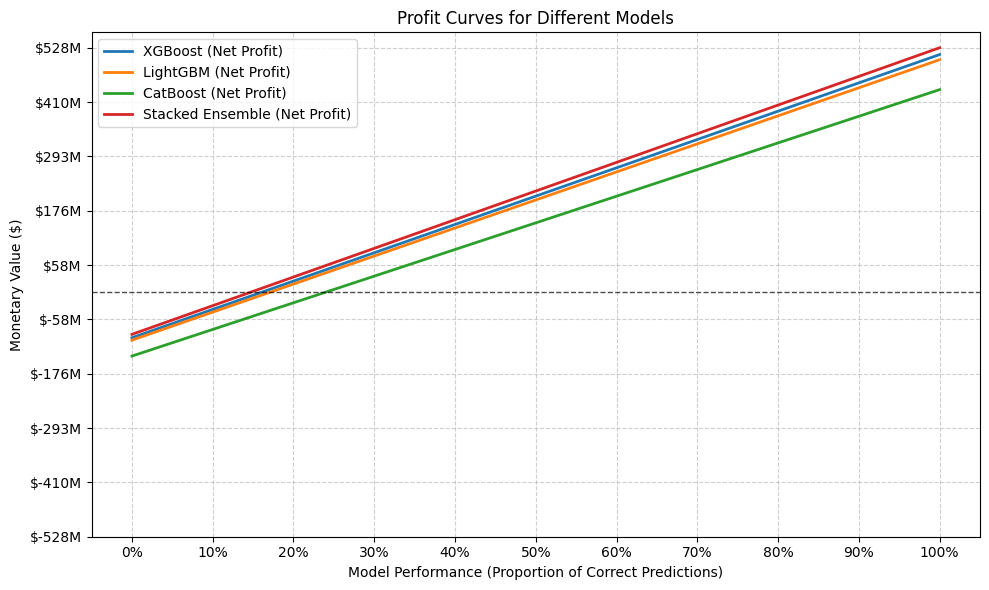

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

def calculate_profit(y_true, y_pred, class_benefits, class_costs):
    cm = confusion_matrix(y_true, y_pred)
    correct = np.diag(cm)  # Correct predictions
    misclassified = cm.sum(axis=1) - correct  # Misclassified predictions

    total_benefit = np.sum(correct * class_benefits)
    total_cost = np.sum(misclassified * class_costs)
    return total_benefit, total_cost

class_benefits = np.array([25000, 75000, 200000])
class_costs = np.array([25000, 50000, 100000])

models = {
    "XGBoost": xgb_predictions,
    "LightGBM": lgbm_predictions,
    "CatBoost": catboost_predictions,
    "Stacked Ensemble": stacked_predictions
}

profit_data = {}
for model_name, y_pred in models.items():
    benefit, cost = calculate_profit(y_test, y_pred, class_benefits, class_costs)
    profit_data[model_name] = {"benefit": benefit, "cost": cost}

performance_steps = np.linspace(0.0, 1.0, 100)
plt.figure(figsize=(10, 6))

for model_name, values in profit_data.items():
    max_benefit = values['benefit']
    max_cost = values['cost']

    simulated_benefits = performance_steps * max_benefit
    simulated_costs = (1 - performance_steps) * max_cost
    simulated_net_profit = simulated_benefits - simulated_costs

    plt.plot(performance_steps, simulated_net_profit, label=f"{model_name} (Net Profit)", linewidth=2)


plt.title('Profit Curves for Different Models')
plt.xlabel('Model Performance (Proportion of Correct Predictions)')
plt.ylabel('Monetary Value ($)')
plt.axhline(0, color='black', linestyle='--', linewidth=1, alpha=0.7)
plt.grid(True, linestyle='--', alpha=0.6)

plt.xticks(np.arange(0, 1.1, 0.1), labels=[f"{int(x*100)}%" for x in np.arange(0, 1.1, 0.1)])
max_y_value = max([v['benefit'] for v in profit_data.values()])  # Find maximum benefit
plt.yticks(np.linspace(-max_y_value, max_y_value, 10),
           labels=[f"${int(y/1e6)}M" for y in np.linspace(-max_y_value, max_y_value, 10)])

plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

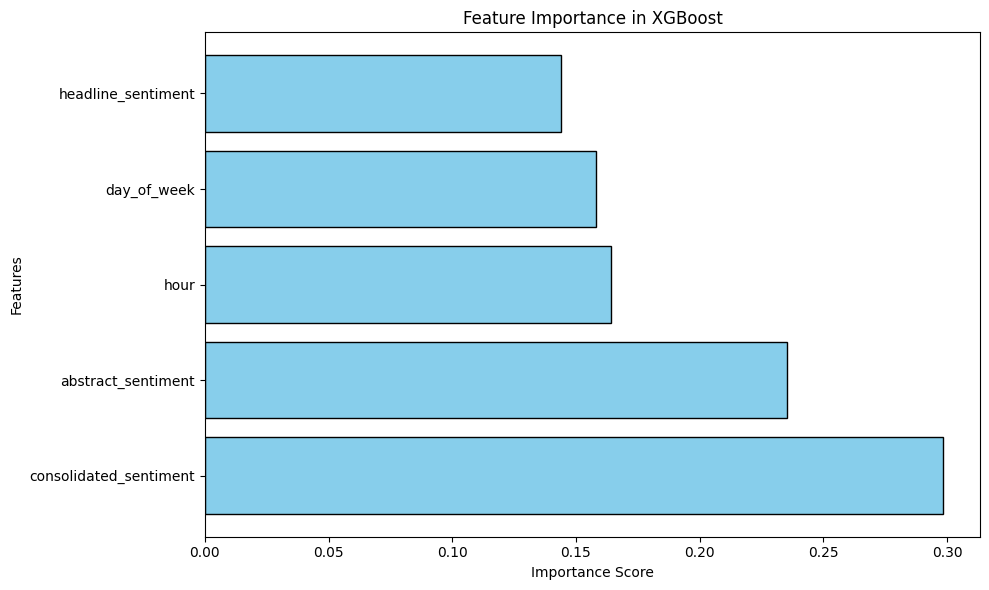

In [ ]:
xgb_importances = xgb_model.feature_importances_
features = ['hour', 'day_of_week', 'headline_sentiment', 'abstract_sentiment', 'consolidated_sentiment']

importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': xgb_importances
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue', edgecolor='black')
plt.title('Feature Importance in XGBoost')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.tight_layout()
plt.show()

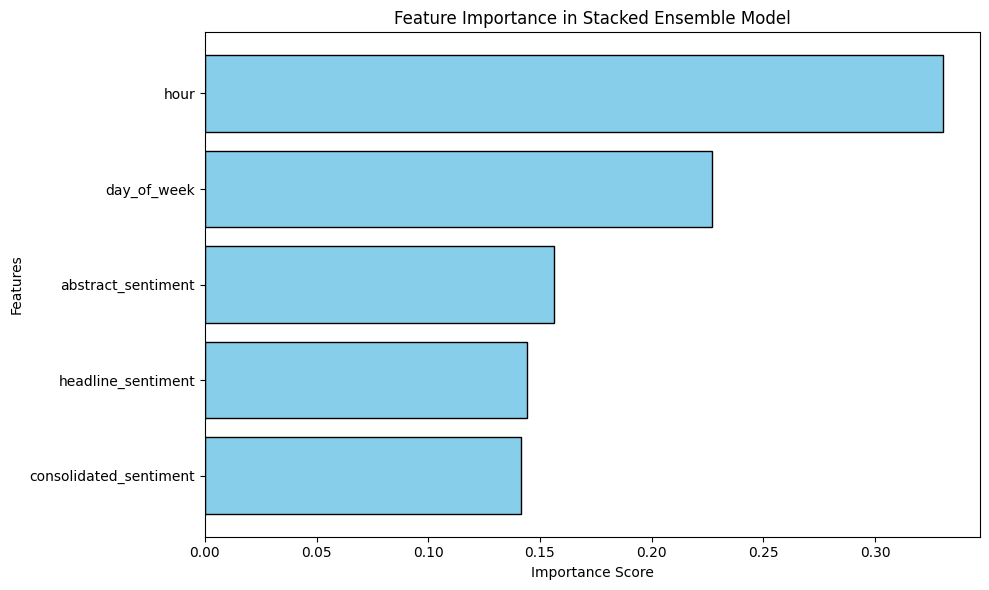

                  Feature  Importance
4                    hour    0.330488
3             day_of_week    0.227093
1      abstract_sentiment    0.156460
0      headline_sentiment    0.144361
2  consolidated_sentiment    0.141598


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

xgb_importance = xgb_model.feature_importances_
lgbm_importance = lgbm_model.feature_importances_
catboost_importance = catboost_model.get_feature_importance()


xgb_importance /= np.sum(xgb_importance)
lgbm_importance = lgbm_importance.astype(float) / np.sum(lgbm_importance)
catboost_importance /= np.sum(catboost_importance)


ensemble_importance = (xgb_importance + lgbm_importance + catboost_importance) / 3


features = ['headline_sentiment', 'abstract_sentiment', 'consolidated_sentiment', 'day_of_week', 'hour']


ensemble_importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': ensemble_importance
}).sort_values(by='Importance', ascending=False)


plt.figure(figsize=(10, 6))
plt.barh(ensemble_importance_df['Feature'], ensemble_importance_df['Importance'], color='skyblue', edgecolor='black')
plt.title('Feature Importance in Stacked Ensemble Model')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


print(ensemble_importance_df)

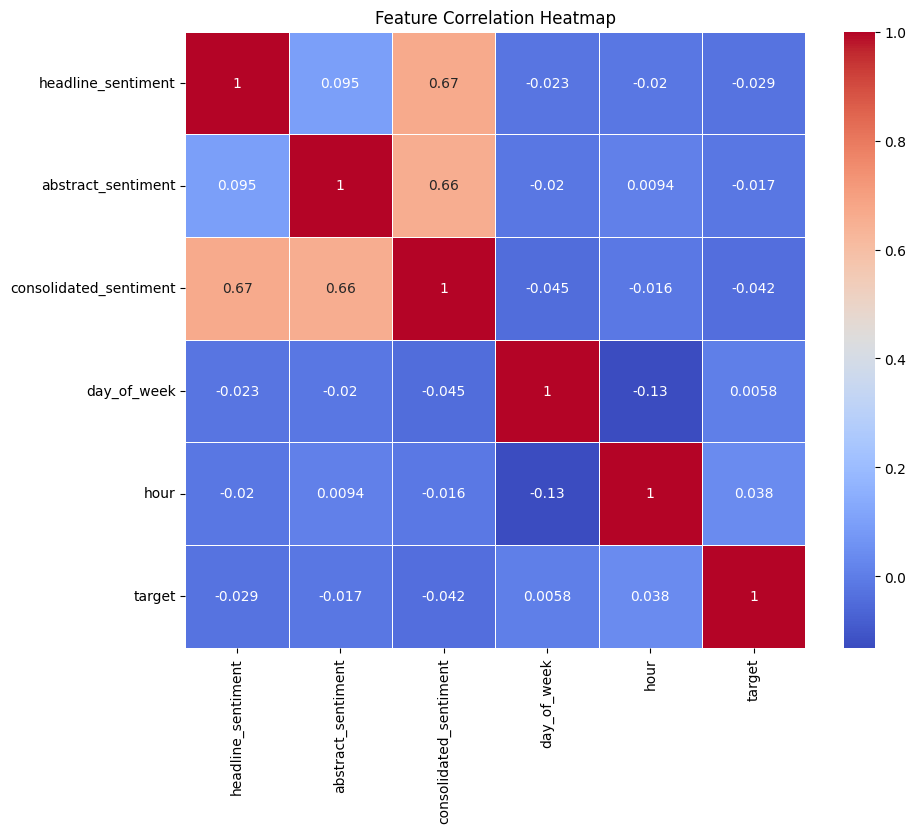

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

data_for_corr = pd.DataFrame(X, columns=['headline_sentiment', 'abstract_sentiment', 'consolidated_sentiment', 'day_of_week', 'hour'])
data_for_corr['target'] = y


corr_matrix = data_for_corr.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Feature Correlation Heatmap')
plt.show()

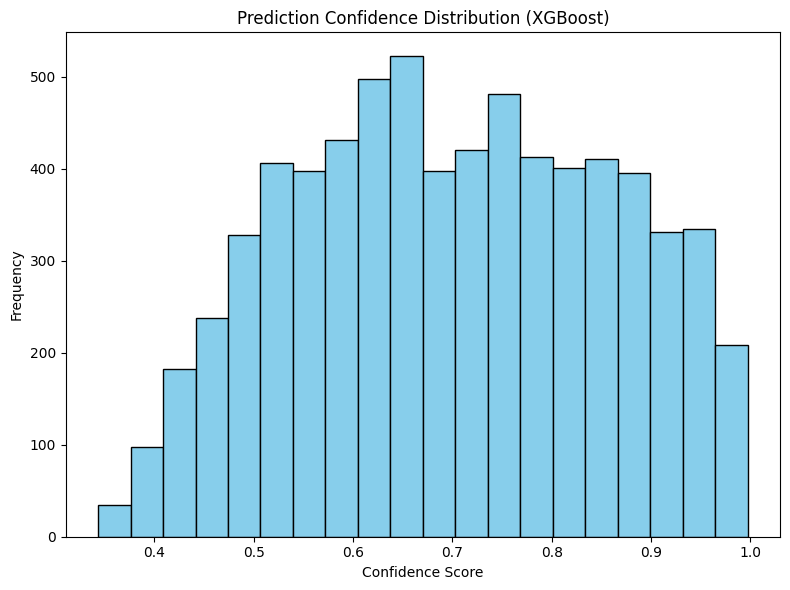

In [ ]:
import matplotlib.pyplot as plt

xgb_confidence = np.max(xgb_model.predict_proba(X_test), axis=1)

plt.figure(figsize=(8, 6))
plt.hist(xgb_confidence, bins=20, color='skyblue', edgecolor='black')
plt.title('Prediction Confidence Distribution (XGBoost)')
plt.xlabel('Confidence Score')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

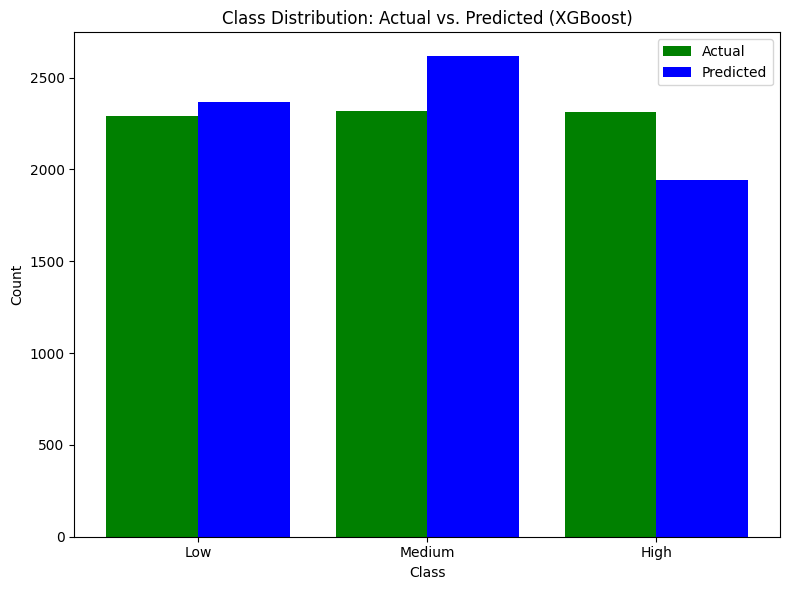

In [ ]:
actual_counts = np.bincount(y_test)
predicted_counts = np.bincount(xgb_predictions)

# Plot class distributions
plt.figure(figsize=(8, 6))
classes = ['Low', 'Medium', 'High']
x = np.arange(len(classes))

plt.bar(x - 0.2, actual_counts, width=0.4, label='Actual', color='green')
plt.bar(x + 0.2, predicted_counts, width=0.4, label='Predicted', color='blue')

plt.xticks(x, classes)
plt.title('Class Distribution: Actual vs. Predicted (XGBoost)')
plt.xlabel('Class')
plt.ylabel('Count')
plt.legend()
plt.tight_layout()
plt.show()

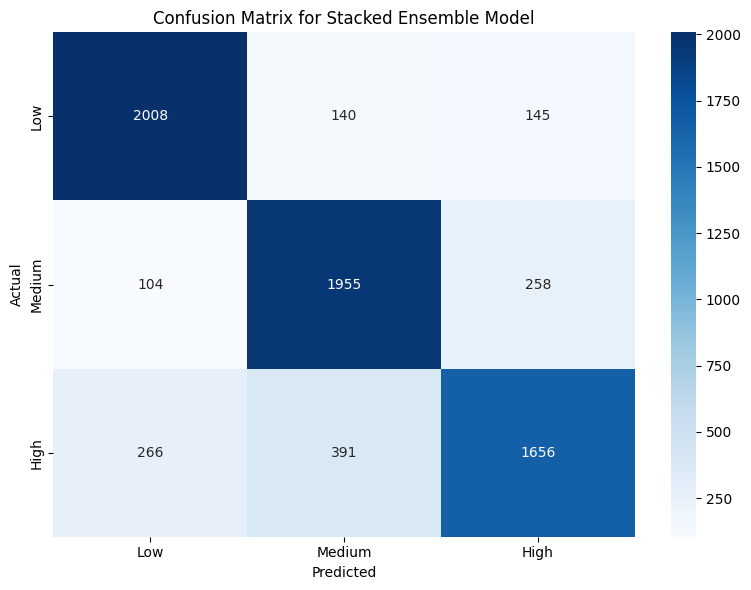

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, stacked_predictions)
class_labels = ['Low', 'Medium', 'High']

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix for Stacked Ensemble Model')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()